# Code

In [1]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.utils import resample
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import seaborn as sns  # import the seaborn library
from matplotlib.colors import LogNorm
from sklearn.model_selection import cross_val_score
from imageio import imread




# Def

In [2]:
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

#calculate MSE
def calculateMSE(f, fpred):
  mse=np.mean((f-fpred)**2)
  return mse

#calculate R2
def R2(f_data, f_model): #calculate R
    return 1 - (np.sum((f_data - f_model) ** 2) / np.sum((f_data - np.mean(f_data)) ** 2))


#def function to calculate the design matrix
def design_matrix(x, y, degree):
    # x and y are expected to be 1-dimensional arrays
    x = x.ravel()  # Flatten x
    y = y.ravel()  # Flatten y
    N = len(x)
    l = int((degree + 1) * (degree + 2) / 2)  # Number of polynomial terms
    X = np.ones((N, l))

    idx = 0
    for i in range(degree + 1):
        for j in range(i + 1):
            X[:, idx] = (x ** (i - j)) * (y ** j)
            idx += 1
    return X

# beta OLS
def calcuateB(X, f):
  beta = np.linalg.pinv(X.T @ X) @ X.T @ f
  return beta


# beta Ridge
def betaRIDGE(X, f, lm):
  I = np.identity(X.shape[1])  # Identity matrix
  beta_RIDGE = np.linalg.inv(X.T @ X + lm * I) @ X.T @ f
  return beta_RIDGE

#function to split the data into train and test and scale them
def split_and_scale(X, f, test_size=0.2, with_std=True):
    X_train, X_test, f_train, f_test = train_test_split(X, f, test_size=test_size)
    scaler_X = StandardScaler(with_std=with_std)
    scaler_X.fit(X_train)
    scaler_f = StandardScaler(with_std=with_std)
    scaler_f.fit(f_train.reshape(-1, 1))

    X_train_scaled = scaler_X.transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    f_train_scaled = scaler_f.transform(f_train.reshape(-1, 1)).ravel()
    f_test_scaled = scaler_f.transform(f_test.reshape(-1, 1)).ravel()

    return X_train_scaled, X_test_scaled, f_train_scaled, f_test_scaled


# 400 point


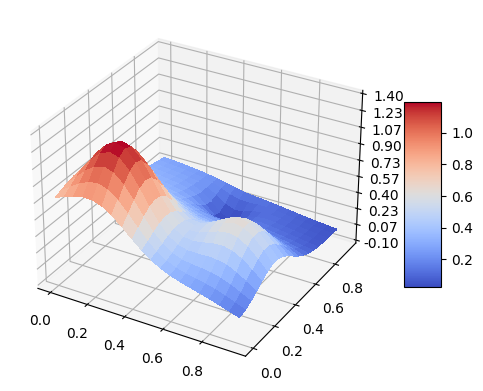

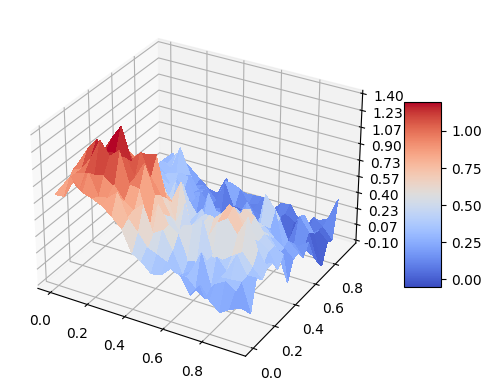

In [3]:
np.random.seed(7935)

fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')
# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)
# 400 data

z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

#add the noise to the franke function
f = FrankeFunction(x,y) + np.random.normal(0, 0.1, z.shape)

fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')

# Plot the surface of the function with the added noise
surf = ax.plot_surface(x, y, f, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

#flatten the franke function value into an array (it was a grid since we used mashgrid)
f = f.ravel()

# OLS

Degree: 0
MSE Train Data: 0.08977781229405715
MSE Test Data: 0.10751374864155838
R2 Train Data: 0.0
R2 Test Data: -0.026584026932597427
------------------------------
Degree: 1
MSE Train Data: 0.03672658175695469
MSE Test Data: 0.032116565296891594
R2 Train Data: 0.6108914990857492
R2 Test Data: 0.6338011709179594
------------------------------
Degree: 2
MSE Train Data: 0.02597833546021845
MSE Test Data: 0.0371747892653156
R2 Train Data: 0.7159283896393489
R2 Test Data: 0.6192860725352433
------------------------------
Degree: 3
MSE Train Data: 0.018252196805858968
MSE Test Data: 0.020591197970175213
R2 Train Data: 0.8060228243467776
R2 Test Data: 0.7620425326959712
------------------------------
Degree: 4
MSE Train Data: 0.01527729062234558
MSE Test Data: 0.010140223894841024
R2 Train Data: 0.8421101359442819
R2 Test Data: 0.8716594751955099
------------------------------
Degree: 5
MSE Train Data: 0.01229663136714695
MSE Test Data: 0.011890438209451723
R2 Train Data: 0.867499179908982

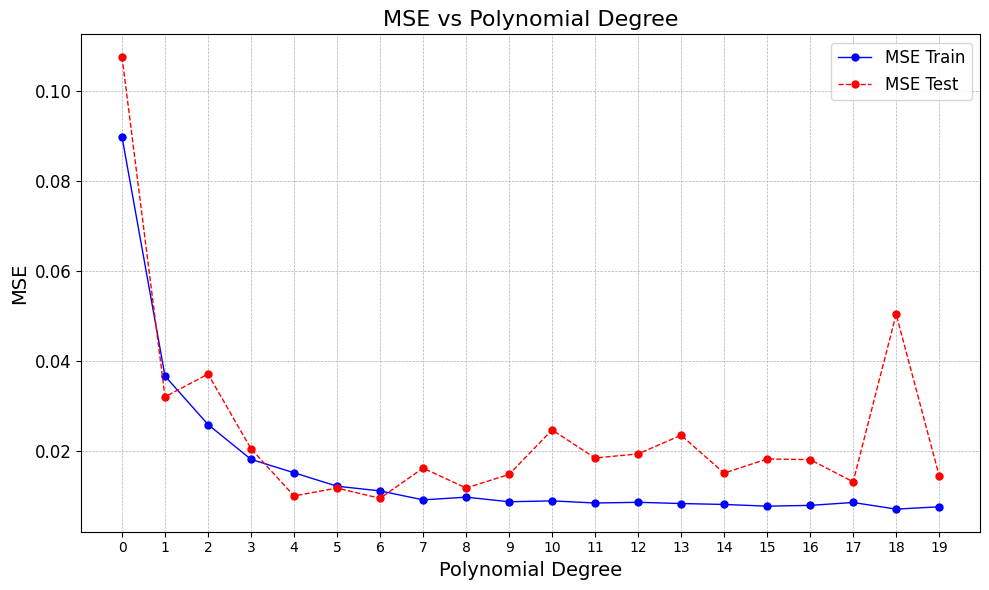

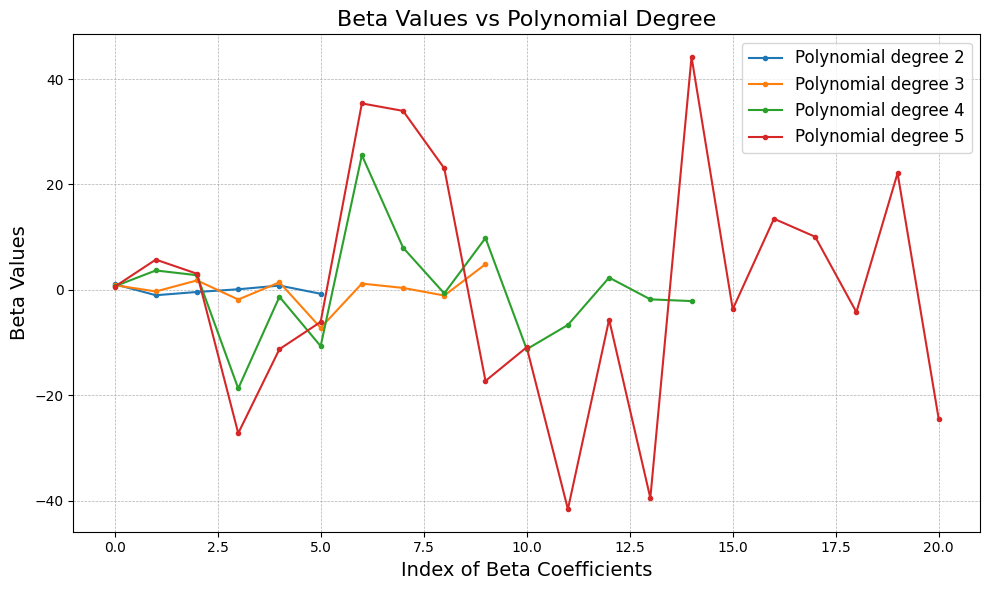

In [6]:
#create vectors to store data
np.random.seed(7935)
maxdegree = 20
polydegree = np.zeros(maxdegree)
MSE_train = np.zeros(maxdegree)
MSE_test = np.zeros(maxdegree)
R2_train = np.zeros(maxdegree)
R2_test = np.zeros(maxdegree)
betas = []

# for loop for every polynomial degree
for degree in range (maxdegree):

    # create design matrix
    X = design_matrix(x, y, degree)
    #divide into train and test data
    X_train, X_test, f_train, f_test = train_test_split(X, f, test_size=0.2)
    # calculate beta
    beta = calcuateB(X_train, f_train)
    betas.append(beta)
    #make the predictions
    ftilde = X_train @ beta
    fpred = X_test @ beta
    #fill the vectors with the data
    polydegree[degree] = degree
    MSE_train[degree] = calculateMSE(f_train, ftilde)
    MSE_test[degree] = calculateMSE(f_test, fpred)
    R2_train[degree] = R2(f_train, ftilde)
    R2_test[degree] = R2(f_test, fpred)

    #print the results
    print(f"Degree: {degree}")
    #print(f"Beta: {beta}")
    print(f"MSE Train Data: {MSE_train[degree]}")
    print(f"MSE Test Data: {MSE_test[degree]}")
    print(f"R2 Train Data: {R2_train[degree]}")
    print(f"R2 Test Data: {R2_test[degree]}")
    print("-" * 30)

# Plotting MSE values
plt.figure(figsize=(10, 6))
plt.plot(polydegree, MSE_train, label='MSE Train', marker='o', linestyle='-', color='blue',  markersize=5, linewidth=1)
plt.plot(polydegree, MSE_test, label='MSE Test', marker='o', linestyle='--', color='red',  markersize=5, linewidth=1)

#plot the MSE vs polydegree graph
plt.xlabel('Polynomial Degree', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.title('MSE vs Polynomial Degree', fontsize=16)
plt.xticks(polydegree)  # Ensure all polynomial degrees are shown
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()  # Adjust layout to fit labels and title
plt.show()

degrees_to_plot = [2,3, 4, 5]

plt.figure(figsize=(10, 6))

# loop on the degrees to plot
for degree in degrees_to_plot:
    beta_values = betas[degree]  # Prendi i valori di beta per il grado corrente
    plt.plot(range(len(beta_values)), beta_values, marker='.', linestyle='-', label=f'Polynomial degree {degree}')

# add title and axes names etc
plt.xlabel('Index of Beta Coefficients', fontsize=14)
plt.ylabel('Beta Values', fontsize=14)
plt.title('Beta Values vs Polynomial Degree', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


# 10000 data

Degree: 0
MSE Train Data: 0.09233069730557804
MSE Test Data: 0.09066770123703591
R2 Train Data: 0.0
R2 Test Data: -0.00014307184729744904
------------------------------
Degree: 1
MSE Train Data: 0.03251988241978702
MSE Test Data: 0.034741624981277024
R2 Train Data: 0.6464488379646742
R2 Test Data: 0.6225445798902474
------------------------------
Degree: 2
MSE Train Data: 0.026441888251580524
MSE Test Data: 0.02795828277201384
R2 Train Data: 0.7086006600527015
R2 Test Data: 0.711731139711754
------------------------------
Degree: 3
MSE Train Data: 0.01747729472816549
MSE Test Data: 0.018865126628798527
R2 Train Data: 0.810150528130487
R2 Test Data: 0.7942397728987126
------------------------------
Degree: 4
MSE Train Data: 0.013901130595936152
MSE Test Data: 0.014113826437554017
R2 Train Data: 0.8494862995906661
R2 Test Data: 0.8439613695601558
------------------------------
Degree: 5
MSE Train Data: 0.012091911797405073
MSE Test Data: 0.012436280993654493
R2 Train Data: 0.870119825414

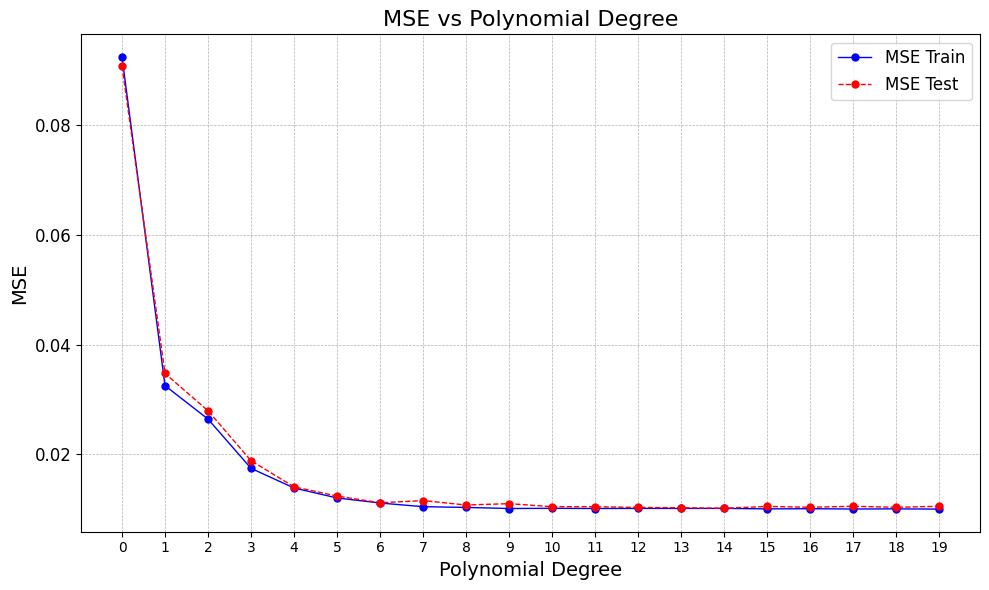

In [6]:
# 10000 data
np.random.seed(7935)

# Make data.
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)
x, y = np.meshgrid(x,y)

z = FrankeFunction(x, y)
#add the noise to the franke function
f = FrankeFunction(x,y) + np.random.normal(0, 0.1, z.shape)

#flatten the franke function value into an array (it was a grid since we used mashgrid)
f = f.ravel()

#create vectors to store data
np.random.seed(7935)
maxdegree = 20
polydegree = np.zeros(maxdegree)
MSE_train = np.zeros(maxdegree)
MSE_test = np.zeros(maxdegree)
R2_train = np.zeros(maxdegree)
R2_test = np.zeros(maxdegree)

# for loop for every polynomial degree
for degree in range (maxdegree):

    # create design matrix
    X = design_matrix(x, y, degree)
    #divide into train and test data
    X_train, X_test, f_train, f_test = train_test_split(X, f, test_size=0.2)
    # calculate beta
    beta = calcuateB(X_train, f_train)
    #make the predictions
    ftilde = X_train @ beta
    fpred = X_test @ beta
    #fill the vectors with the data
    polydegree[degree] = degree
    MSE_train[degree] = calculateMSE(f_train, ftilde)
    MSE_test[degree] = calculateMSE(f_test, fpred)
    R2_train[degree] = R2(f_train, ftilde)
    R2_test[degree] = R2(f_test, fpred)

    #print the results
    print(f"Degree: {degree}")
    #print(f"Beta: {beta}")
    print(f"MSE Train Data: {MSE_train[degree]}")
    print(f"MSE Test Data: {MSE_test[degree]}")
    print(f"R2 Train Data: {R2_train[degree]}")
    print(f"R2 Test Data: {R2_test[degree]}")
    print("-" * 30)

# Plotting MSE values
plt.figure(figsize=(10, 6))
plt.plot(polydegree, MSE_train, label='MSE Train', marker='o', linestyle='-', color='blue',  markersize=5, linewidth=1)
plt.plot(polydegree, MSE_test, label='MSE Test', marker='o', linestyle='--', color='red',  markersize=5, linewidth=1)

#plot the MSE vs polydegree graph
plt.xlabel('Polynomial Degree', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.title('MSE vs Polynomial Degree', fontsize=16)
plt.xticks(polydegree)  # Ensure all polynomial degrees are shown
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()  # Adjust layout to fit labels and title
plt.show()



# Ridge


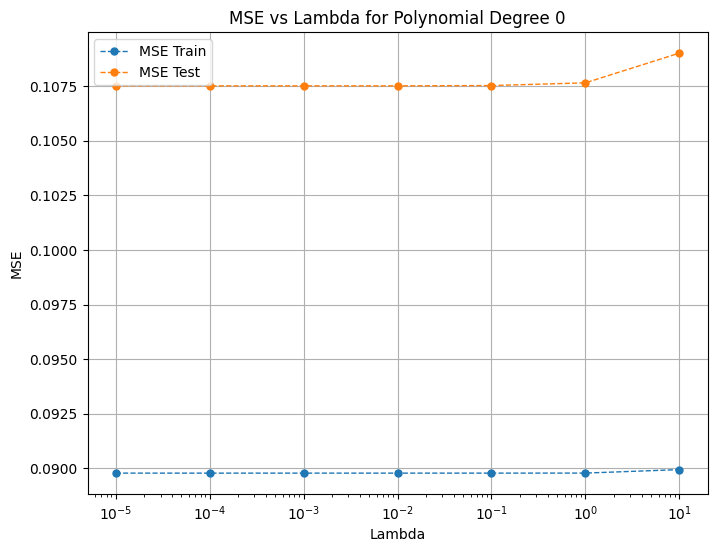

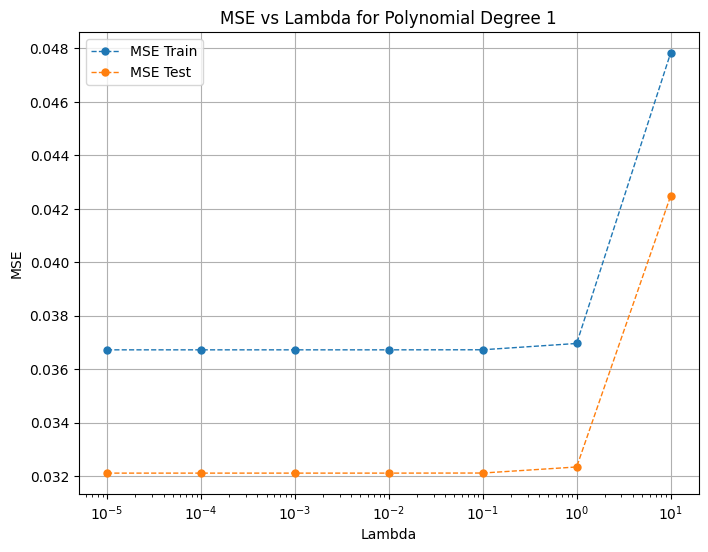

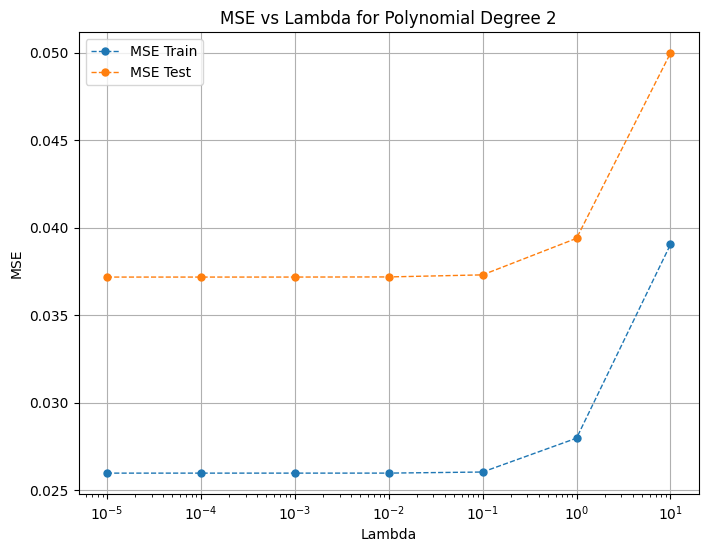

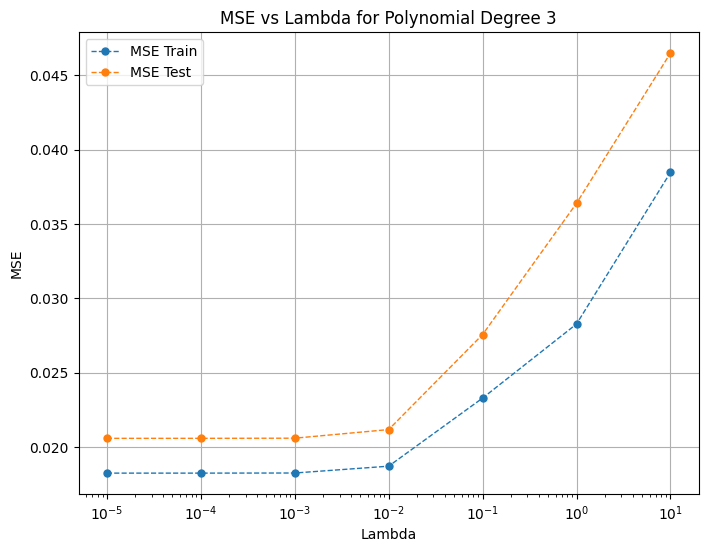

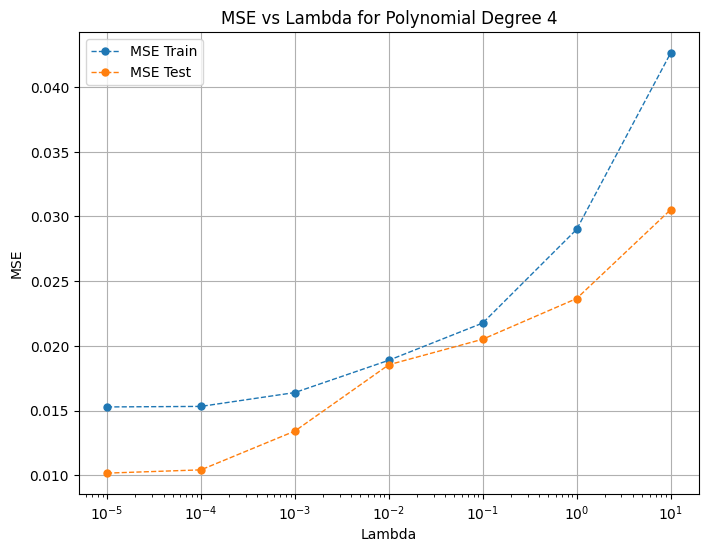

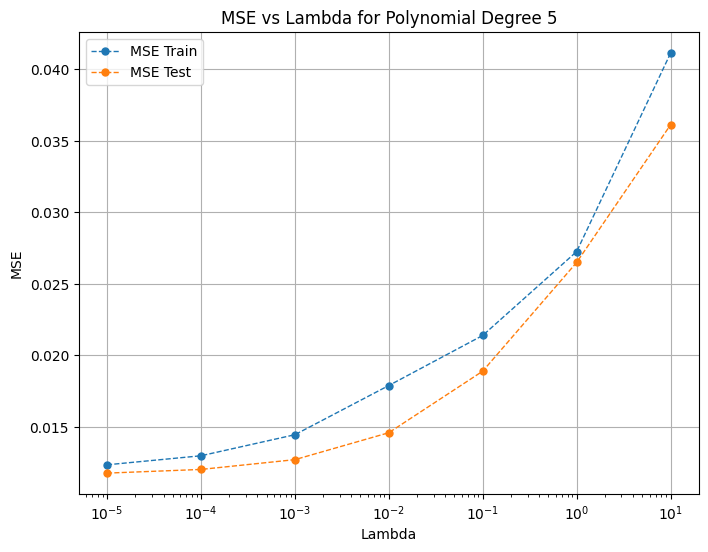

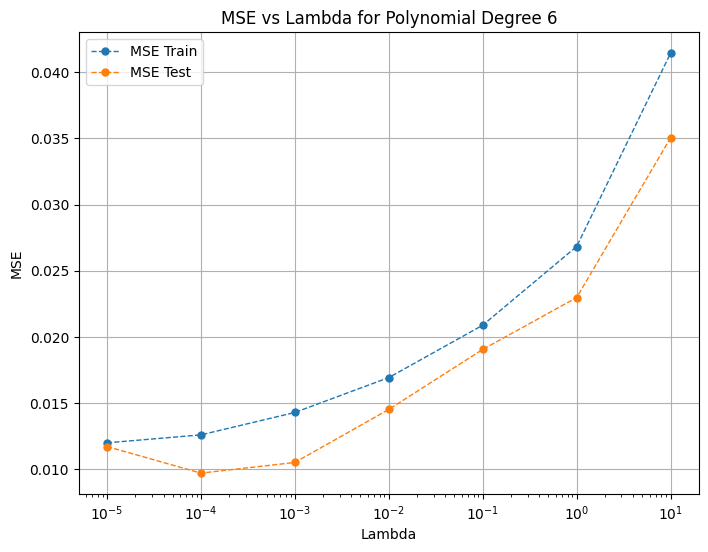

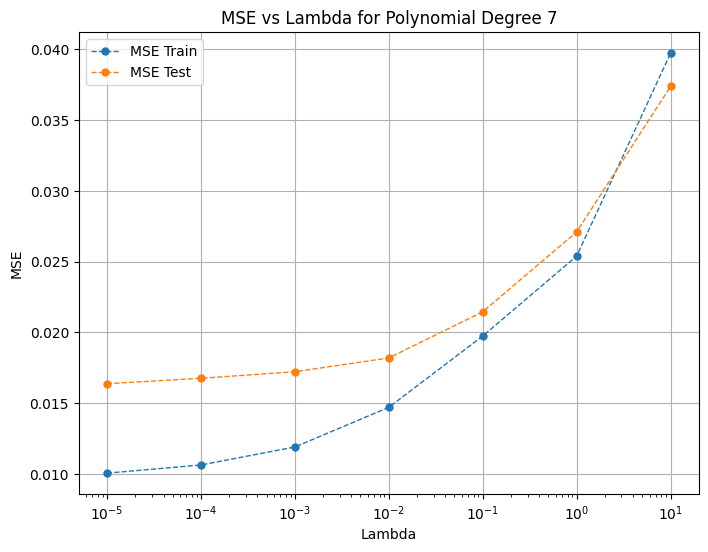

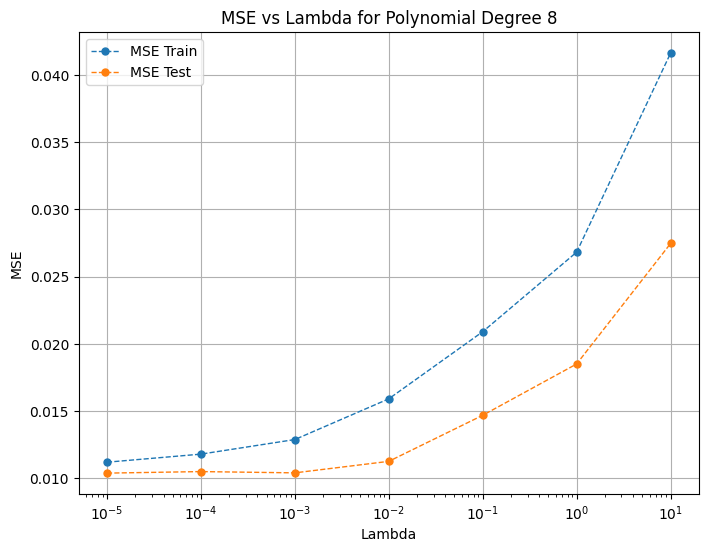

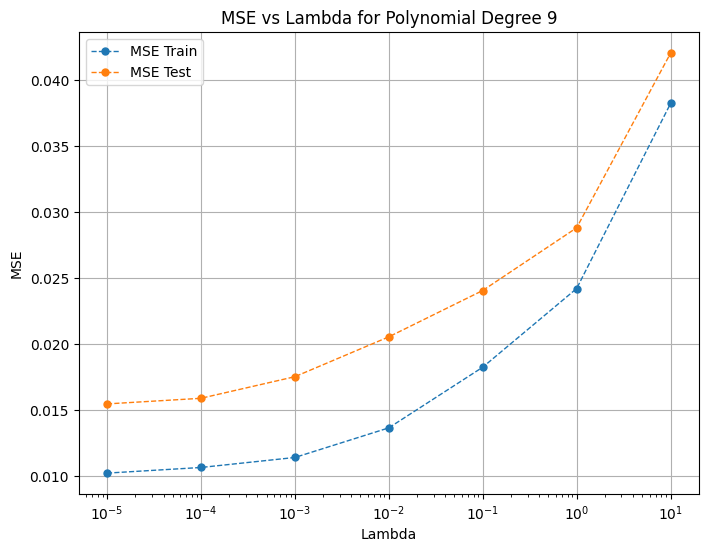

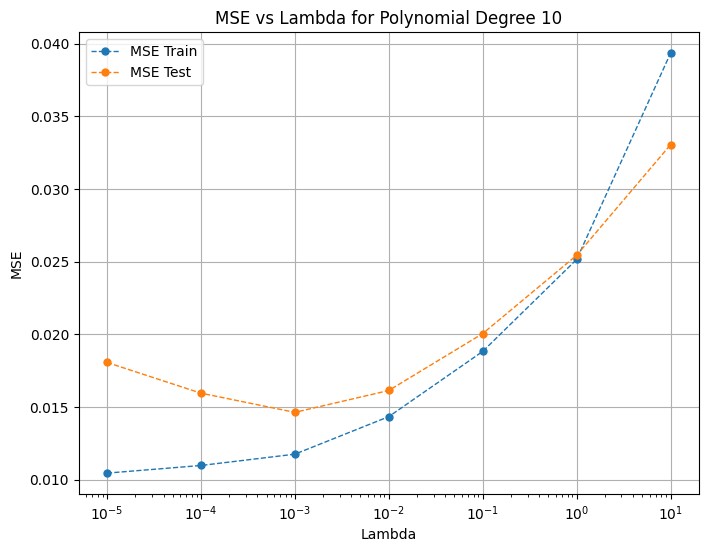

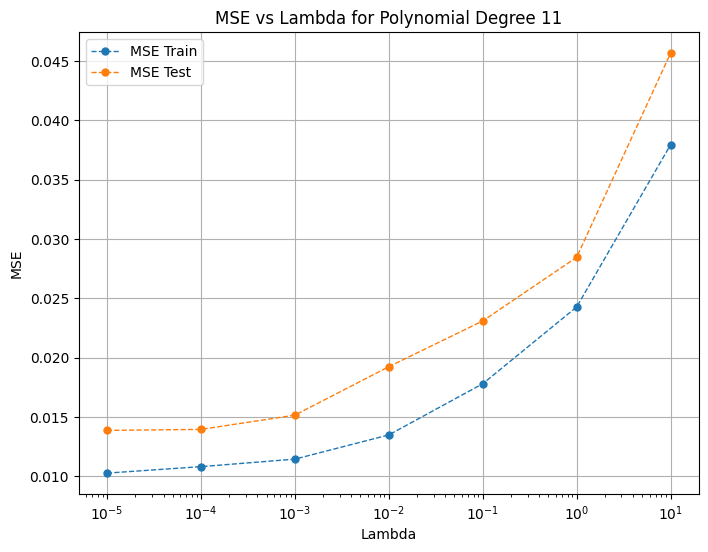

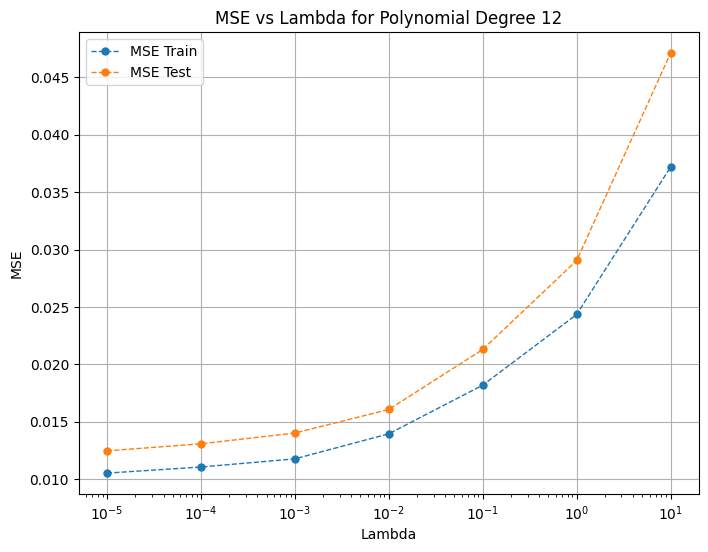

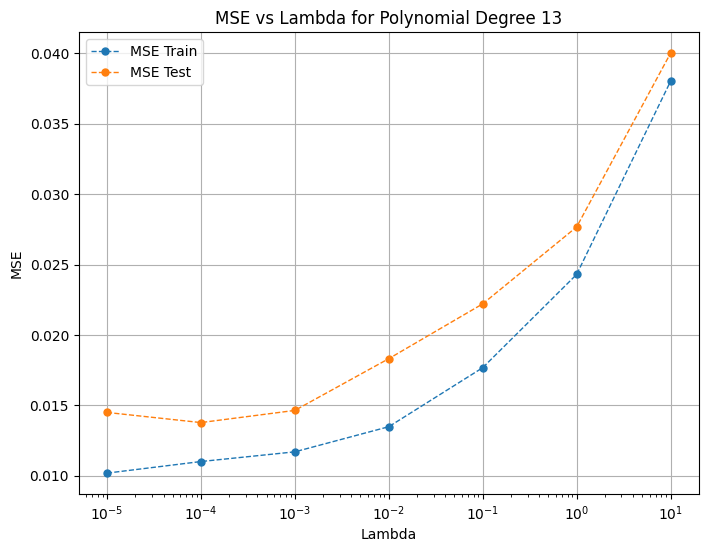

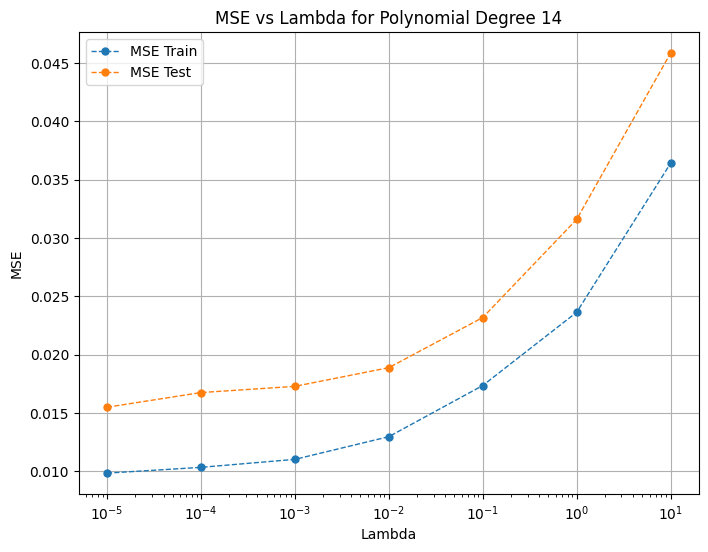

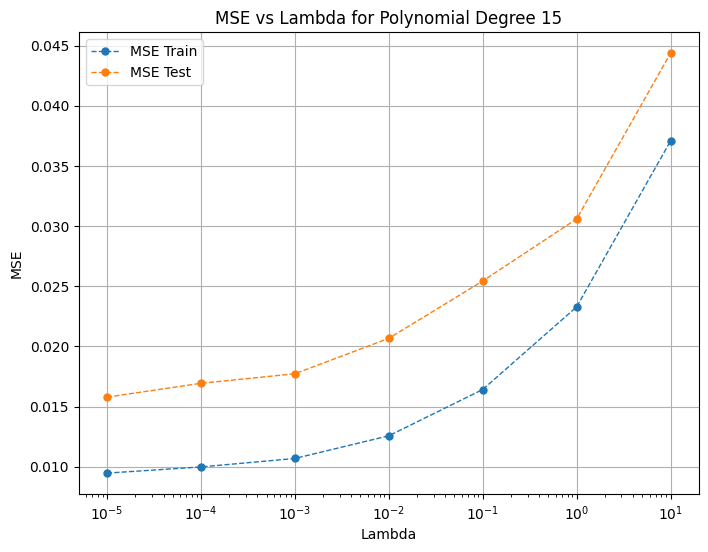

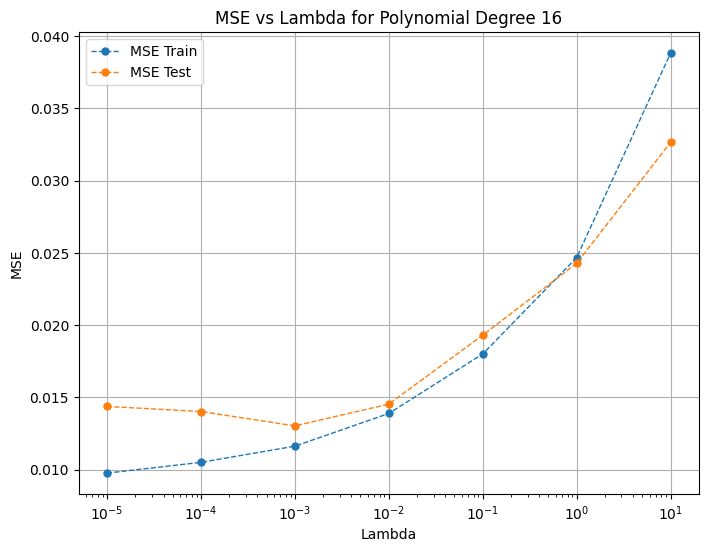

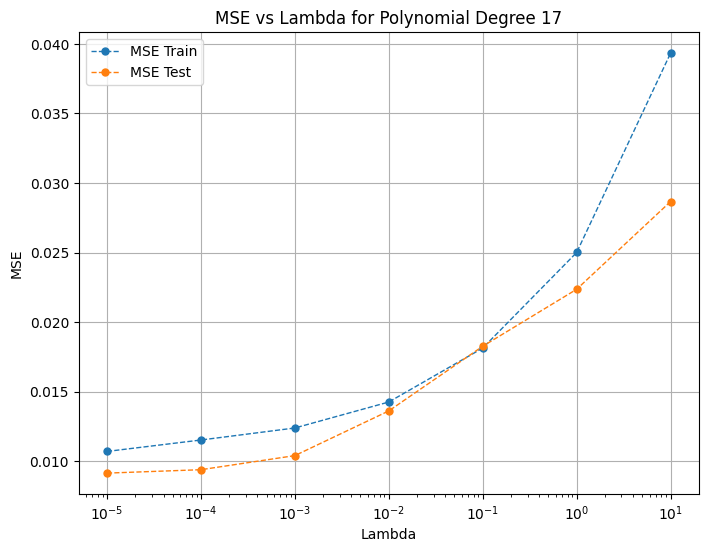

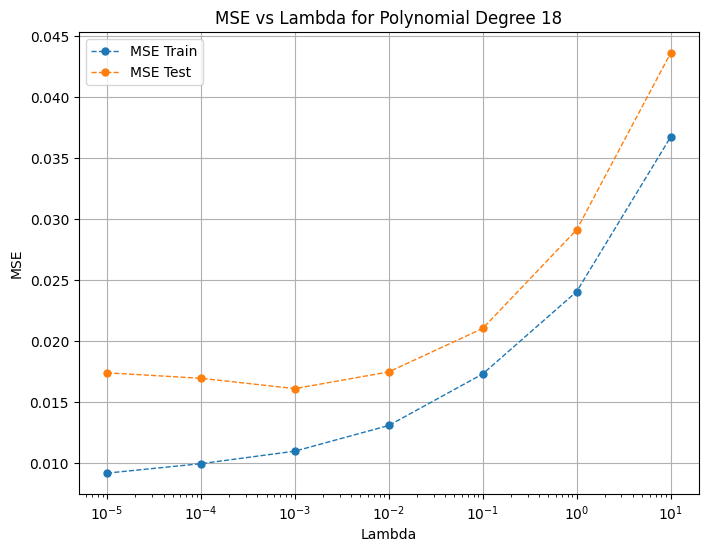

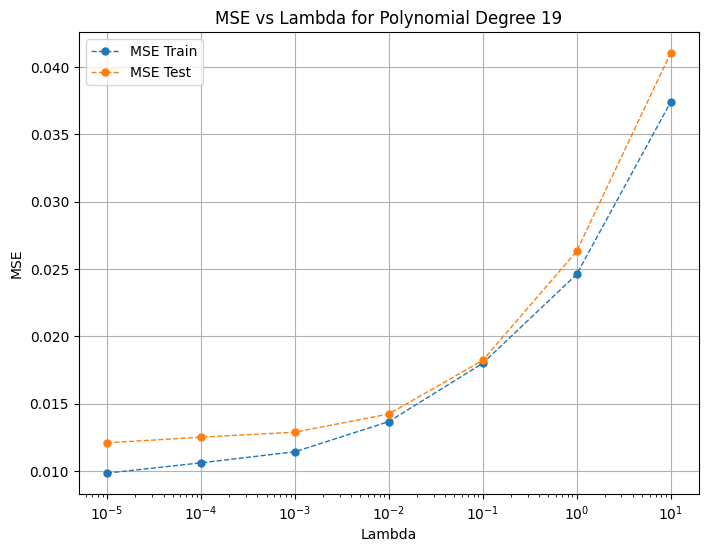

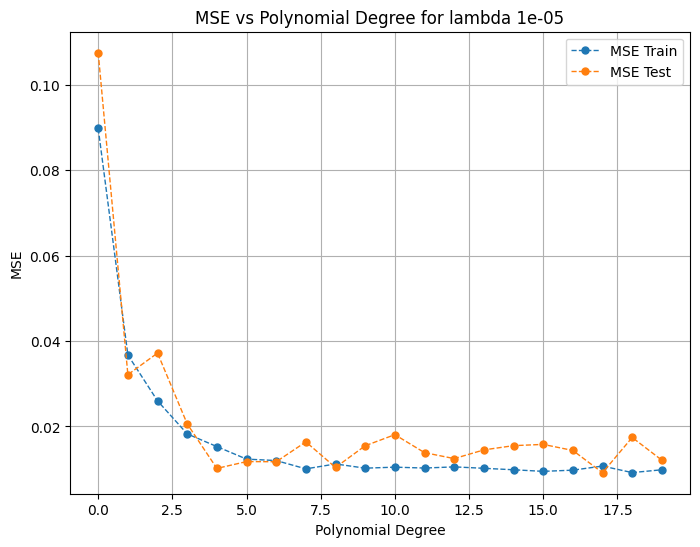

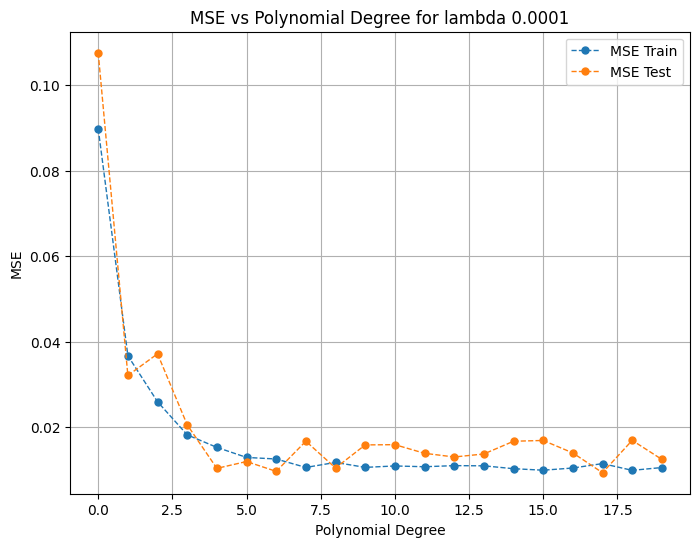

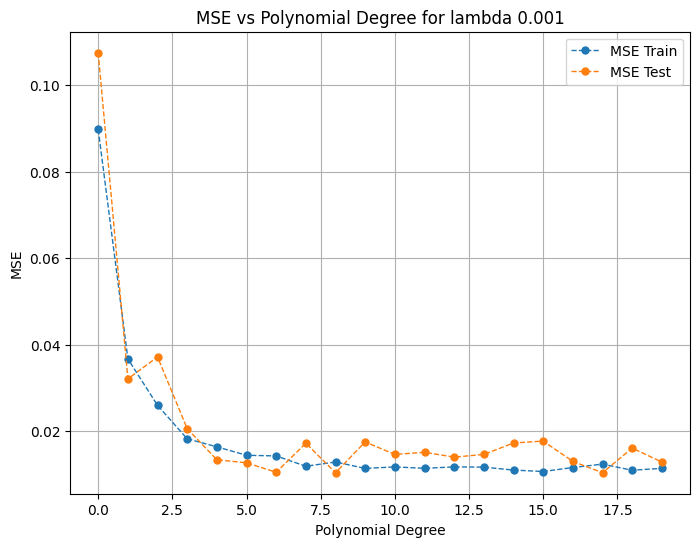

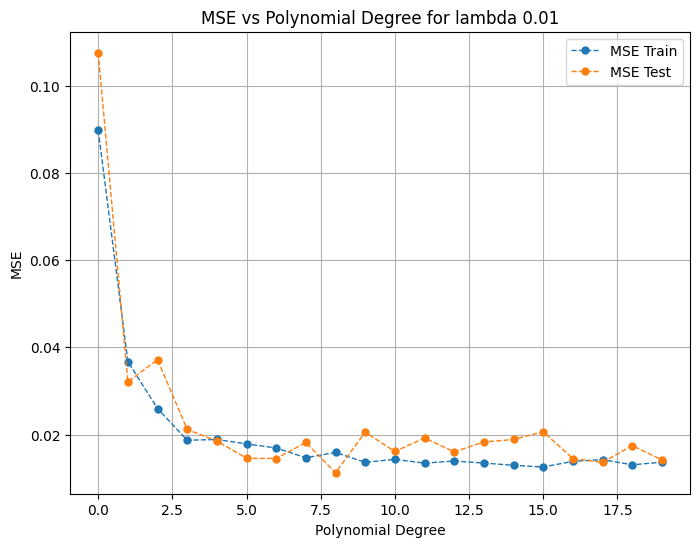

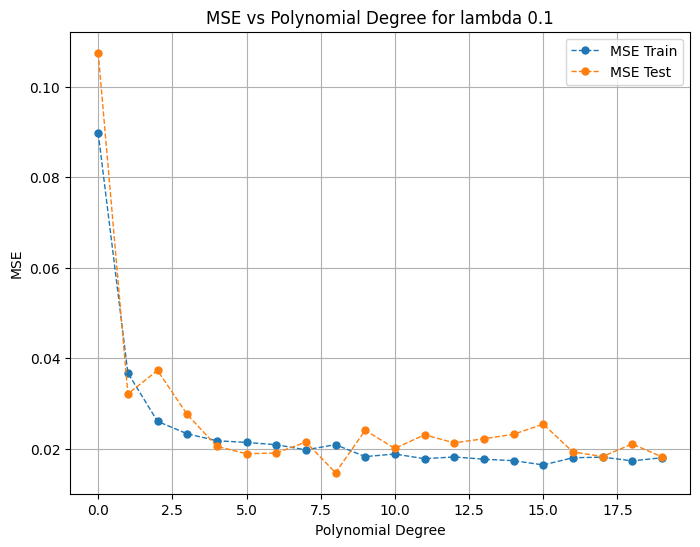

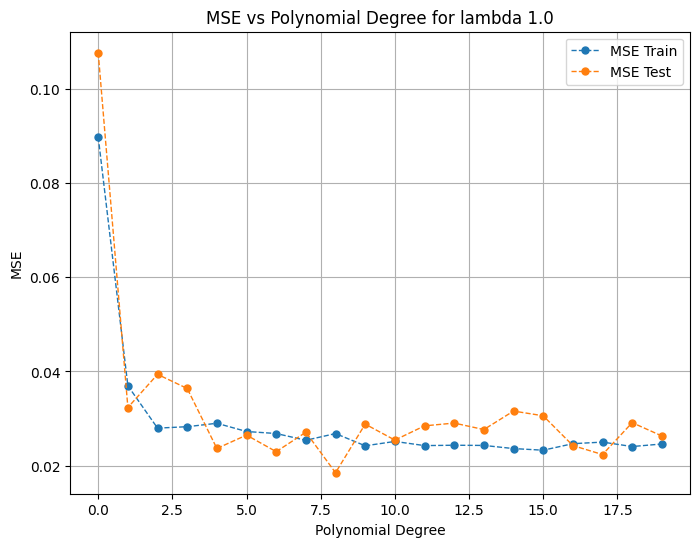

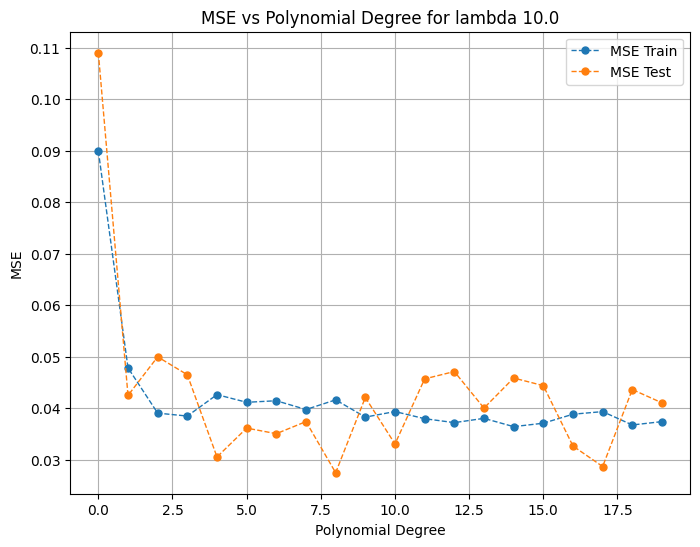

In [7]:
#RIDGE
np.random.seed(7935)

#choose the lambda values
lm_val = [1e-5, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]

MSEridge_train = np.zeros((maxdegree,len(lm_val)))
MSEridge_test = np.zeros((maxdegree,len(lm_val)))
R2ridge_train = np.zeros((maxdegree,len(lm_val)))
R2ridge_test = np.zeros((maxdegree,len(lm_val)))

#start of the big loop
for i in range (maxdegree):
  X = design_matrix(x, y, i)
  X_train, X_test, f_train, f_test = train_test_split(X, f, test_size=0.2)
  #polynomial ridge regression
  for j, lmd in enumerate(lm_val):
      betaridge = betaRIDGE(X_train, f_train, lmd)
      ftildeRidge = X_train @ betaridge
      fpredictRidge = X_test @ betaridge
      #fill the matrices
      MSEridge_train[i, j] = calculateMSE(f_train, ftildeRidge)
      MSEridge_test[i, j] = calculateMSE(f_test, fpredictRidge)
      R2ridge_train[i, j] = R2(f_train, ftildeRidge)
      R2ridge_test[i, j] = R2(f_test, fpredictRidge)

  #plot the MSE vs lambda graph
  if i in range(maxdegree):
      plt.figure(figsize=(8, 6))
      plt.plot(lm_val, MSEridge_train[i], label='MSE Train', marker='o', linestyle='--', markersize=5, linewidth=1)
      plt.plot(lm_val, MSEridge_test[i], label='MSE Test', marker='o', linestyle='--', markersize=5, linewidth=1)
      plt.xscale('log')  # Scala logaritmica per lambda
      plt.xlabel('Lambda')
      plt.ylabel('MSE')
      plt.title(f'MSE vs Lambda for Polynomial Degree {i}')
      plt.legend()
      plt.grid(True)
      plt.show()

#plot the MSE vs polydegree graph
for k, lmd in enumerate(lm_val):
    #if k in [1, 3]:
        plt.figure(figsize=(8, 6))
        plt.plot(polydegree, MSEridge_train[:,k], label='MSE Train', marker='o', linestyle='--', markersize=5, linewidth=1)
        plt.plot(polydegree, MSEridge_test[:,k], label='MSE Test', marker='o', linestyle='--', markersize=5, linewidth=1)
        plt.xlabel('Polynomial Degree')
        plt.ylabel('MSE')
        plt.title(f'MSE vs Polynomial Degree for lambda {lm_val[k]}')
        plt.legend()
        plt.grid(True)
        plt.show()



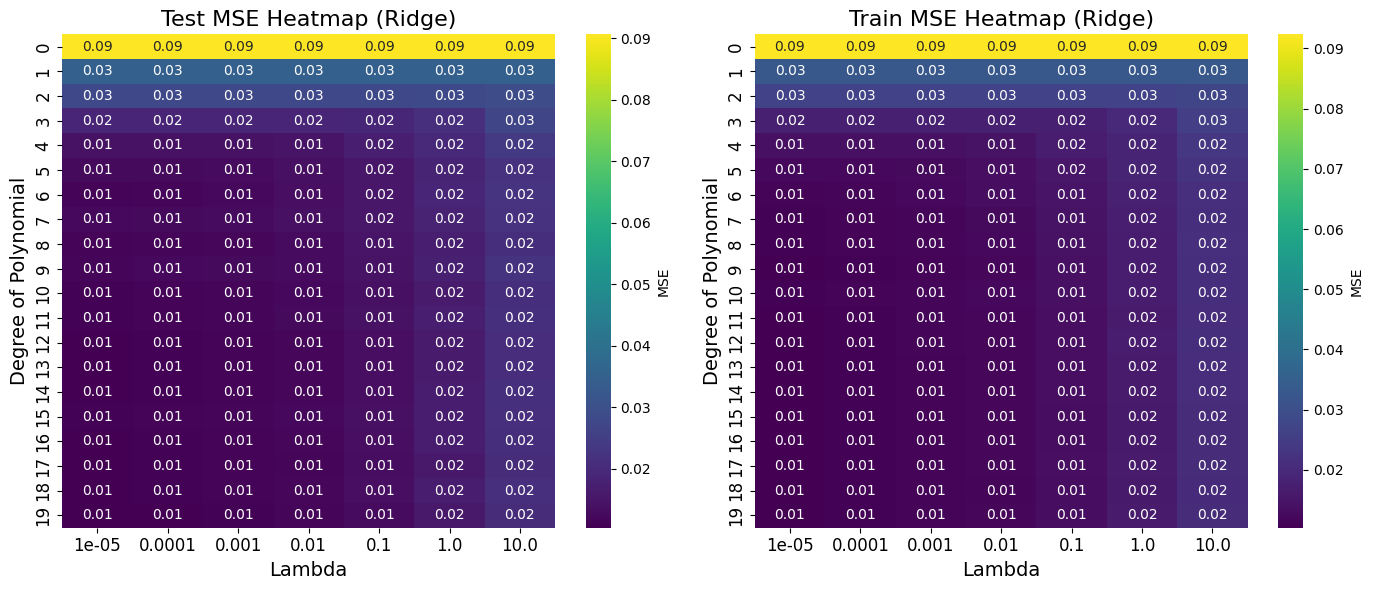

In [8]:
plt.figure(figsize=(14, 6))

# Heatmap for test MSE Ridge
plt.subplot(1, 2, 1)
sns.heatmap(MSEridge_test, annot=True, fmt=".2f", cmap='viridis',
            xticklabels=lm_val, yticklabels=range(maxdegree),
            cbar_kws={'label': 'MSE'})
plt.title('Test MSE Heatmap (Ridge)', fontsize=16)
plt.xlabel('Lambda', fontsize=14)
plt.ylabel('Degree of Polynomial', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)

# Heatmap for train MSE Ridge
plt.subplot(1, 2, 2)
sns.heatmap(MSEridge_train, annot=True, fmt=".2f", cmap='viridis',
            xticklabels=lm_val, yticklabels=range(maxdegree),
            cbar_kws={'label': 'MSE'})
plt.title('Train MSE Heatmap (Ridge)', fontsize=16)
plt.xlabel('Lambda', fontsize=14)
plt.ylabel('Degree of Polynomial', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)

plt.tight_layout()
plt.show()


# Lasso


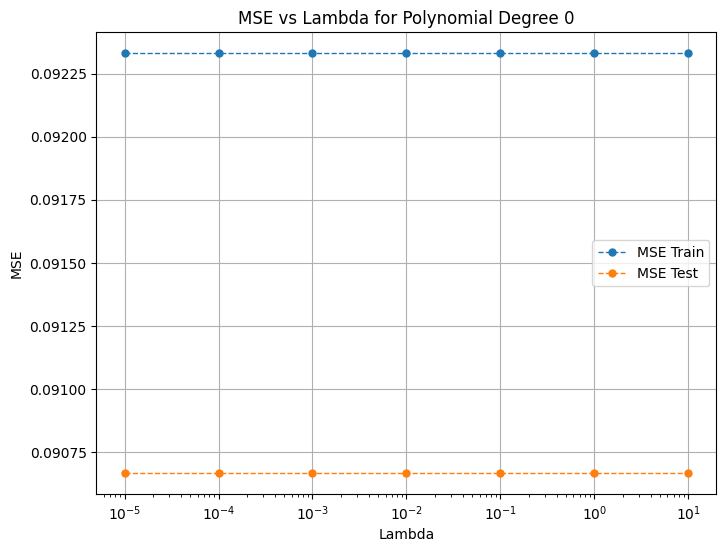

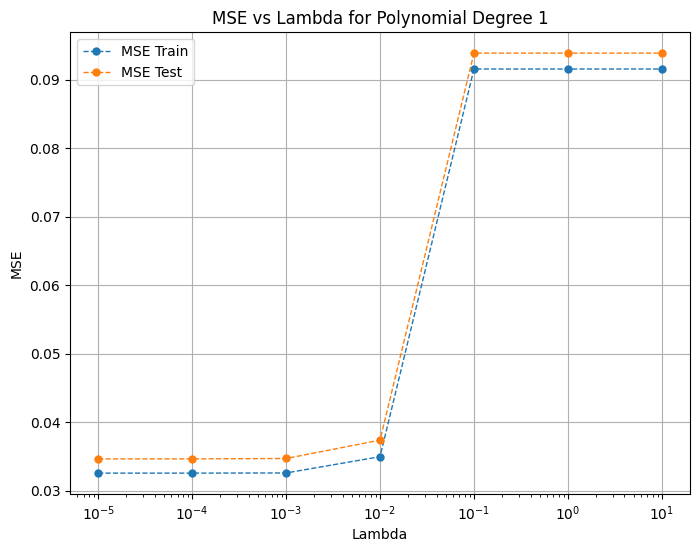

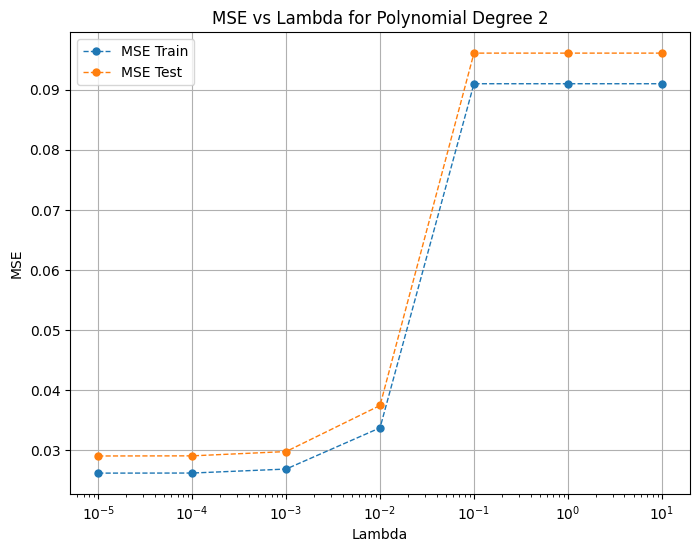

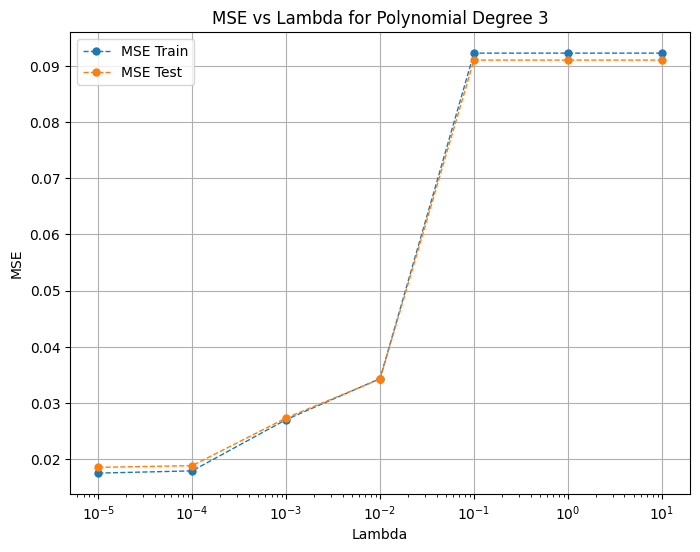

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.010e+01, tolerance: 7.360e-02
  model = cd_fast.enet_coordinate_descent(


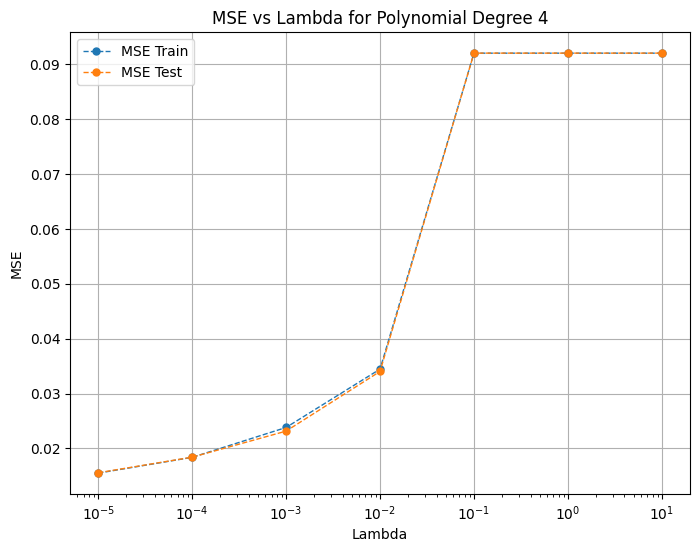

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.269e+01, tolerance: 7.378e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.194e-01, tolerance: 7.378e-02
  model = cd_fast.enet_coordinate_descent(


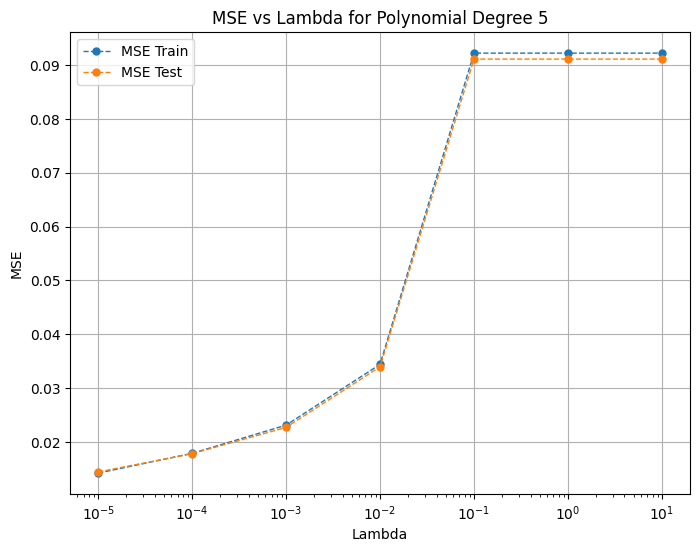

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.314e+01, tolerance: 7.313e-02
  model = cd_fast.enet_coordinate_descent(


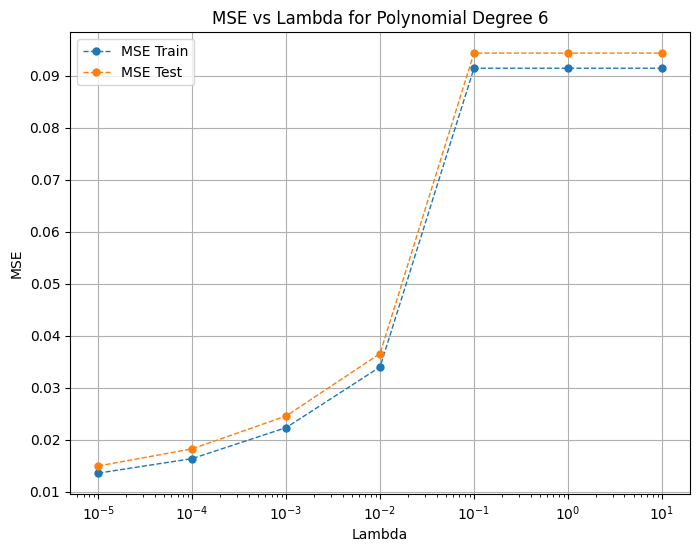

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.229e+01, tolerance: 7.429e-02
  model = cd_fast.enet_coordinate_descent(


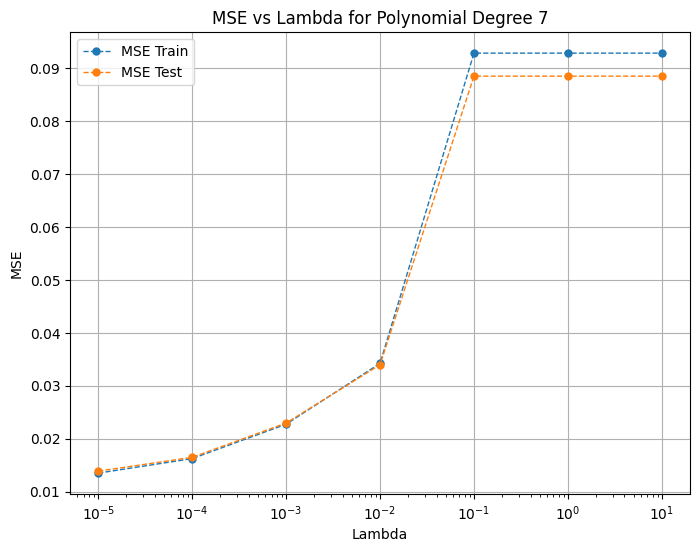

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.809e+01, tolerance: 7.374e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.730e-01, tolerance: 7.374e-02
  model = cd_fast.enet_coordinate_descent(


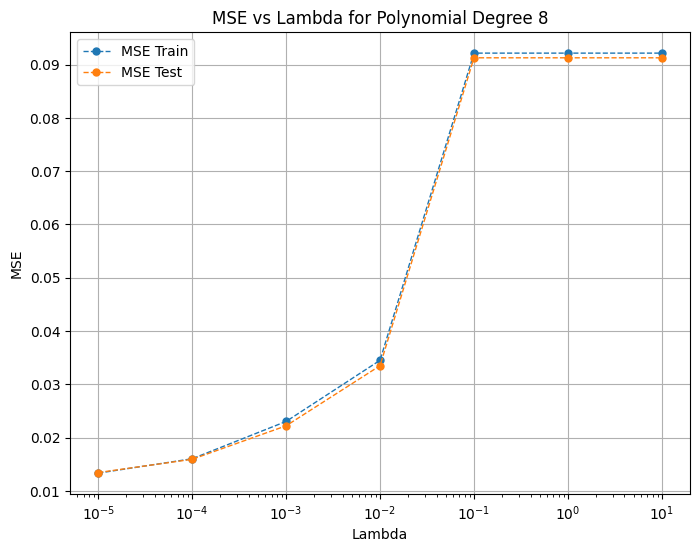

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.848e+01, tolerance: 7.365e-02
  model = cd_fast.enet_coordinate_descent(


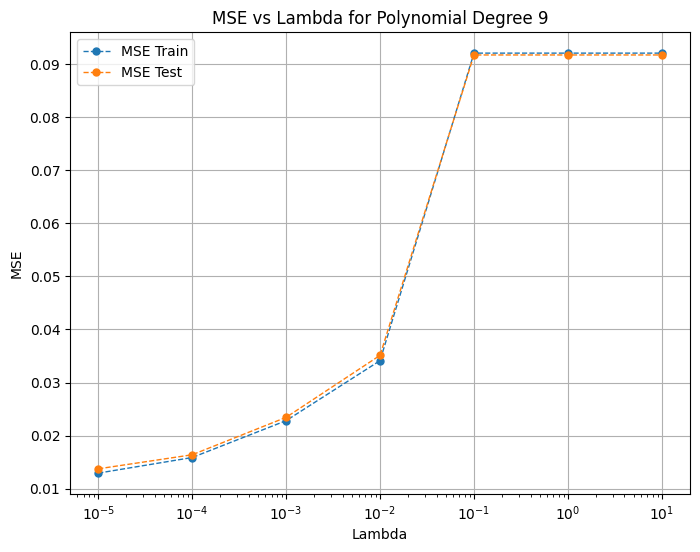

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.579e+01, tolerance: 7.355e-02
  model = cd_fast.enet_coordinate_descent(


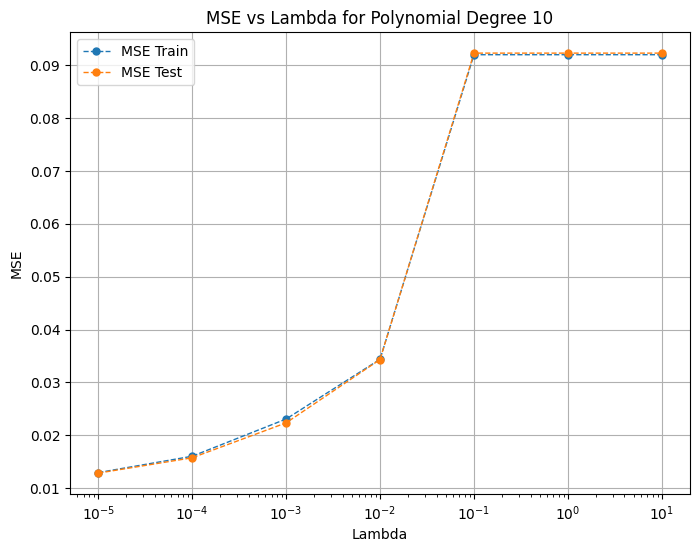

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.382e+01, tolerance: 7.349e-02
  model = cd_fast.enet_coordinate_descent(


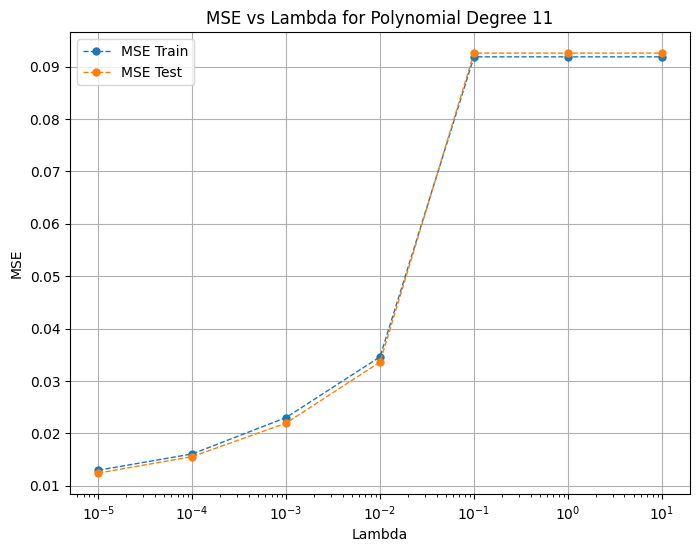

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.020e+01, tolerance: 7.381e-02
  model = cd_fast.enet_coordinate_descent(


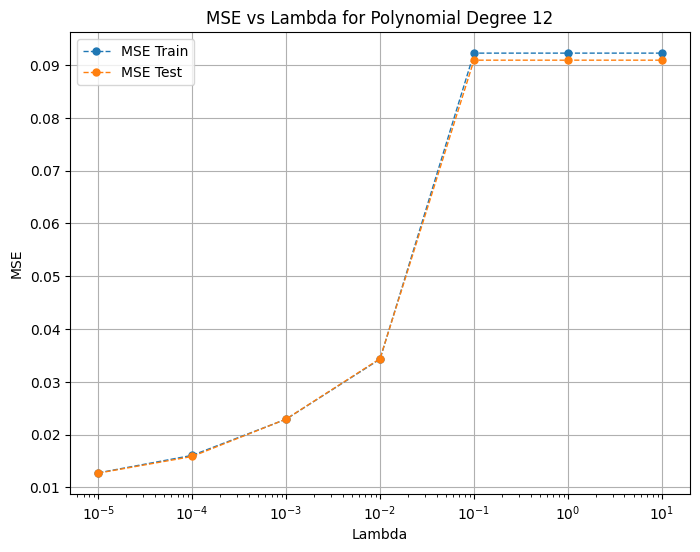

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.755e+01, tolerance: 7.365e-02
  model = cd_fast.enet_coordinate_descent(


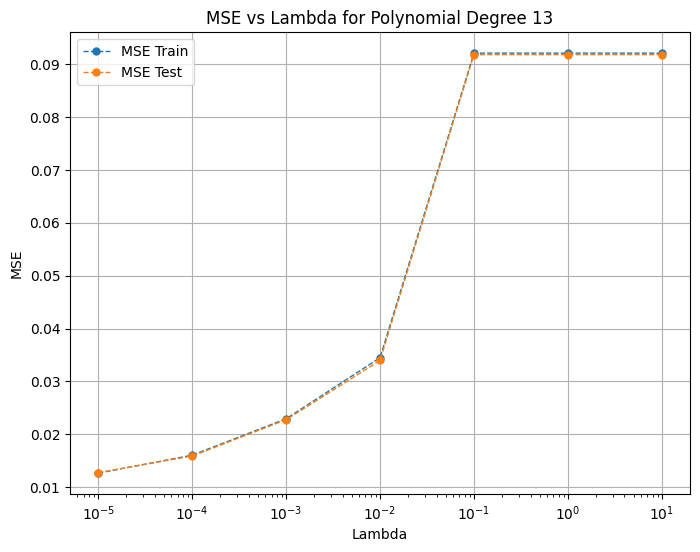

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.748e+01, tolerance: 7.367e-02
  model = cd_fast.enet_coordinate_descent(


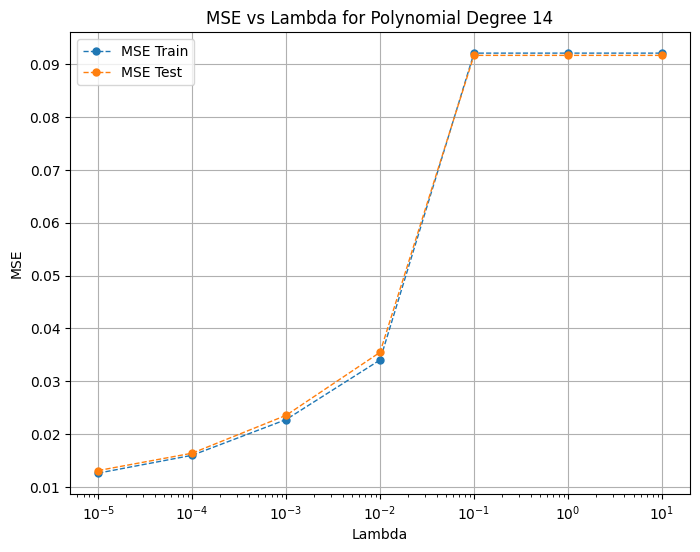

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.533e+01, tolerance: 7.408e-02
  model = cd_fast.enet_coordinate_descent(


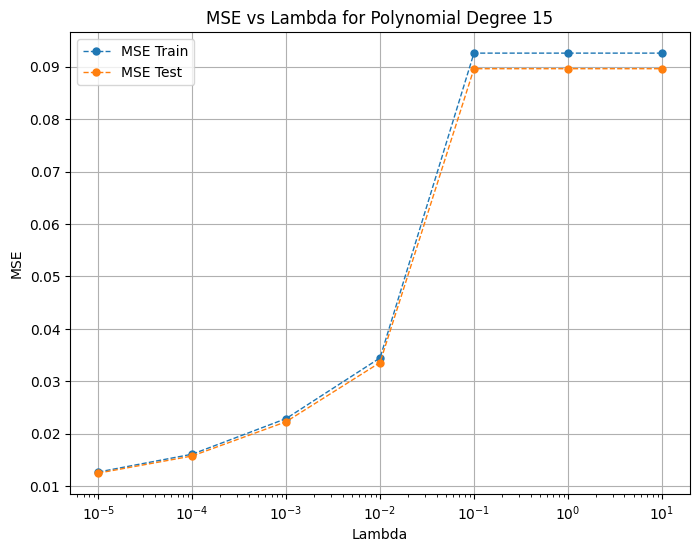

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.669e+01, tolerance: 7.379e-02
  model = cd_fast.enet_coordinate_descent(


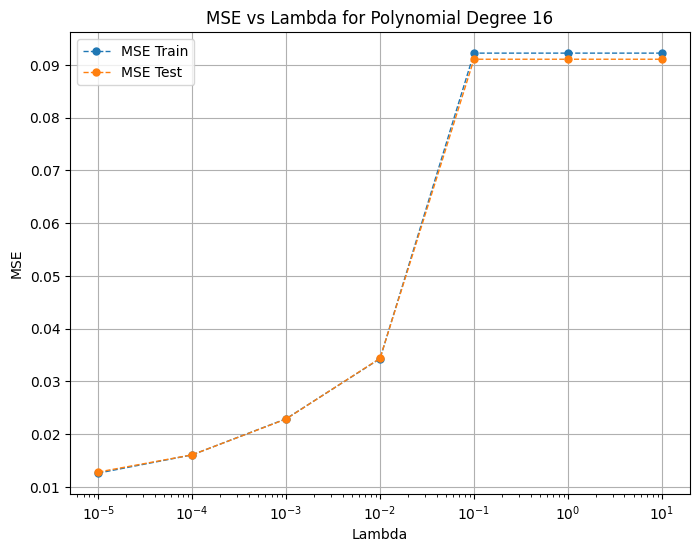

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.908e+01, tolerance: 7.427e-02
  model = cd_fast.enet_coordinate_descent(


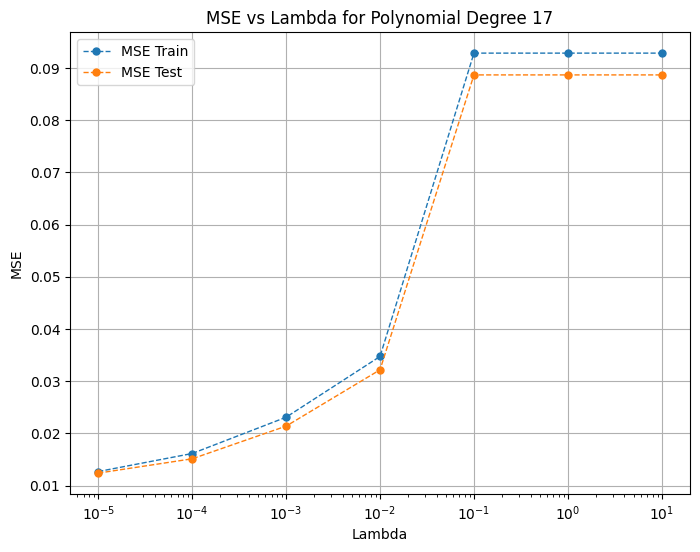

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.555e+01, tolerance: 7.347e-02
  model = cd_fast.enet_coordinate_descent(


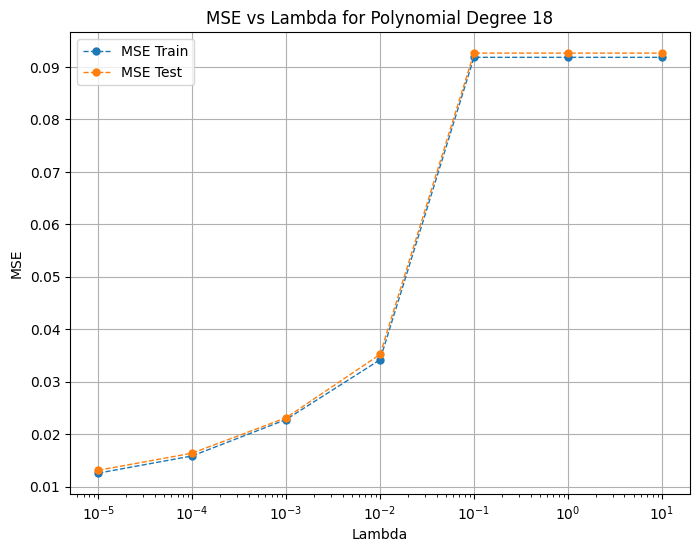

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.965e+01, tolerance: 7.383e-02
  model = cd_fast.enet_coordinate_descent(


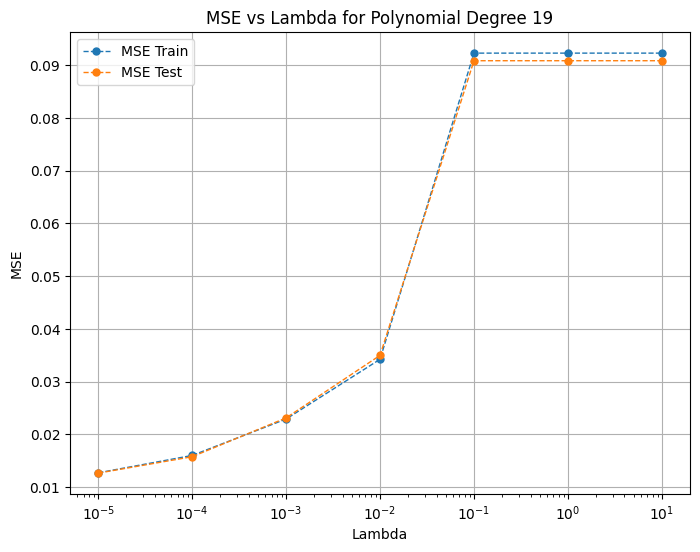

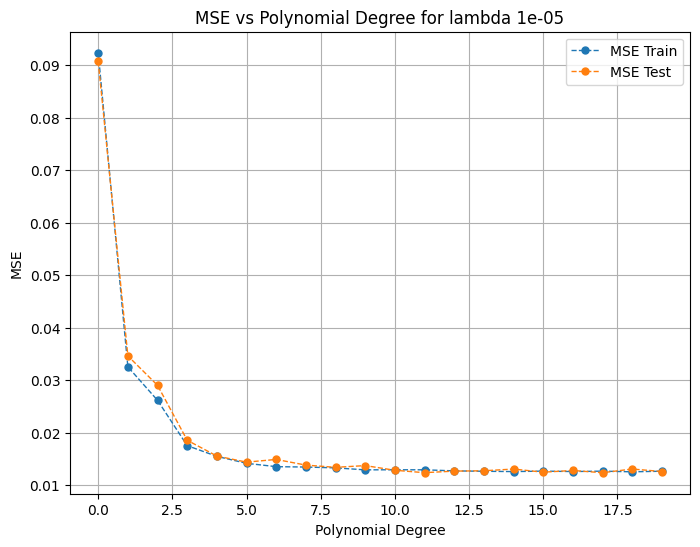

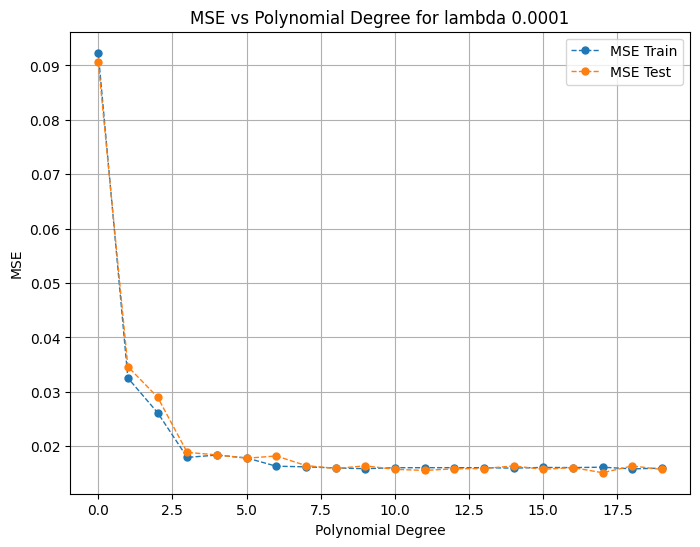

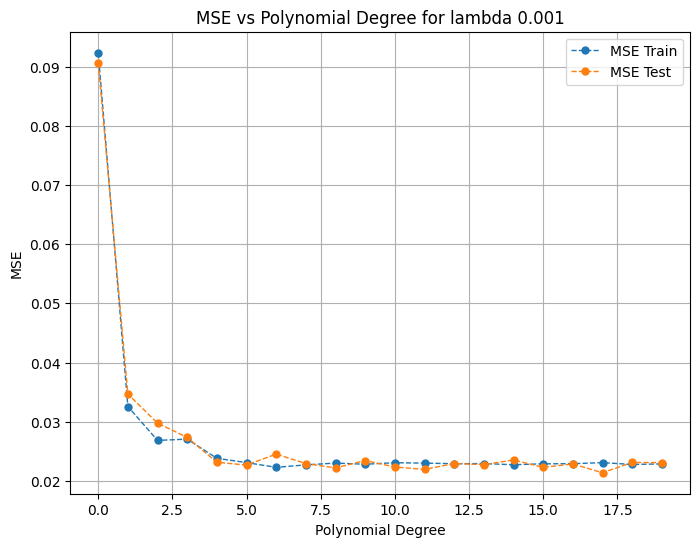

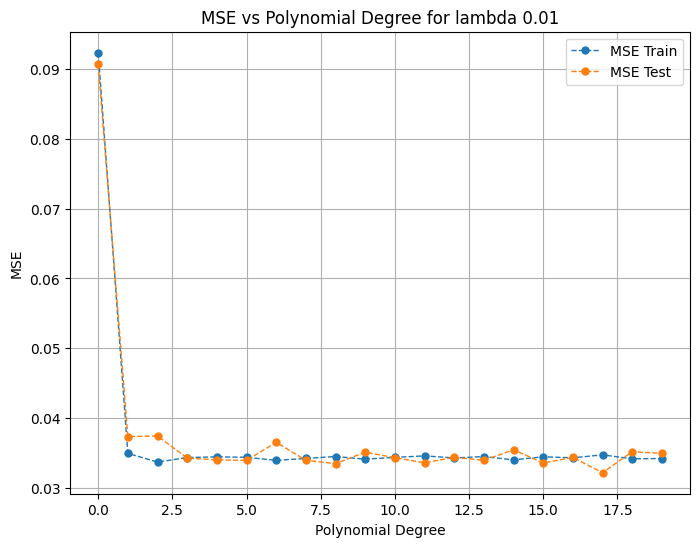

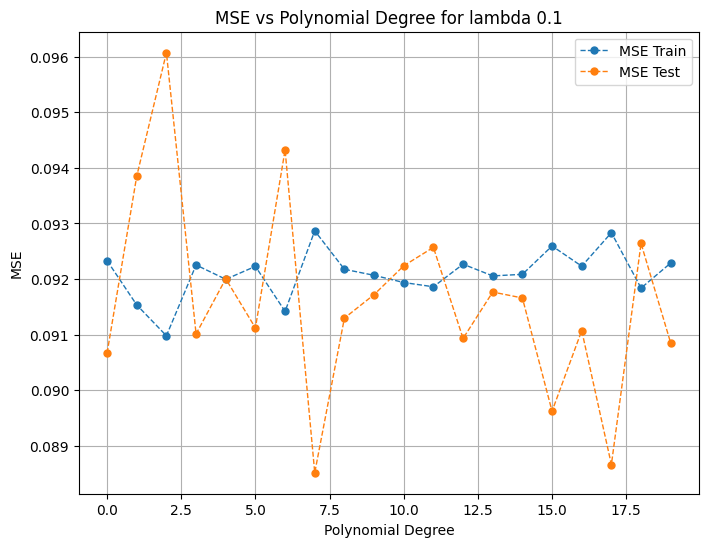

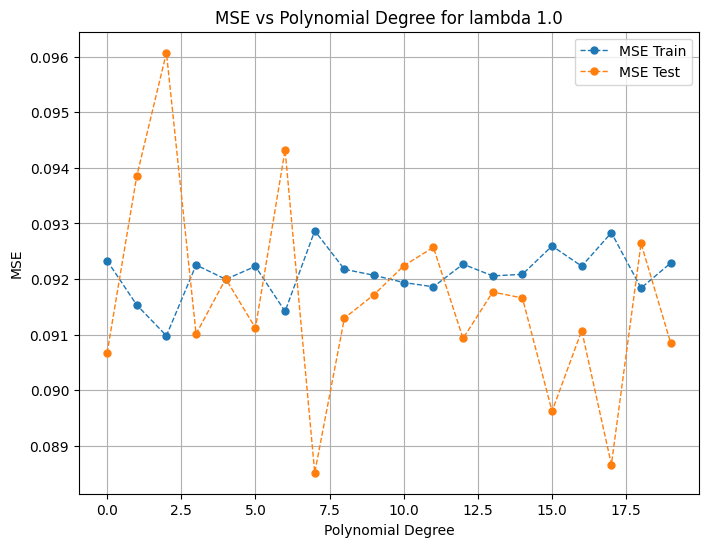

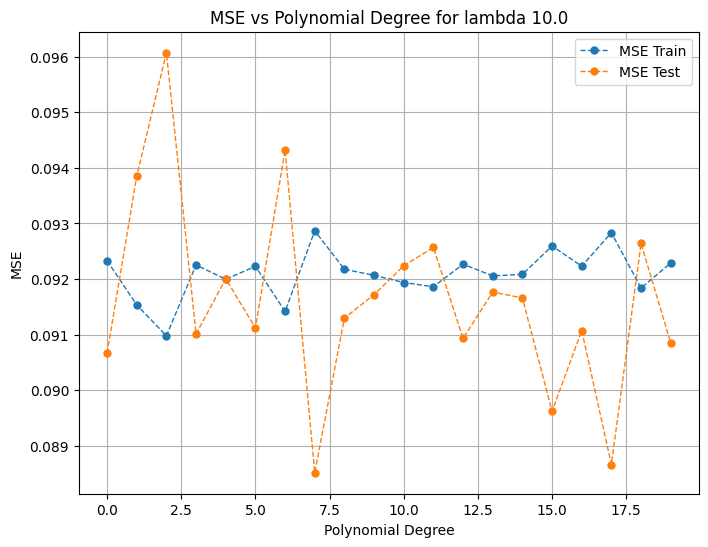

In [9]:
#LASSO
np.random.seed(7935)
MSElasso_train = np.zeros((maxdegree,len(lm_val)))
MSElasso_test = np.zeros((maxdegree,len(lm_val)))
R2lasso_train = np.zeros((maxdegree,len(lm_val)))
R2lasso_test = np.zeros((maxdegree,len(lm_val)))

#start of the big loop
for i in range (maxdegree):
  X = design_matrix(x, y, i)
  X_train, X_test, f_train, f_test = train_test_split(X, f, test_size=0.2)

  #polynomial ridge regression
  for j, lmd in enumerate(lm_val):
      RegLasso = linear_model.Lasso(lmd,fit_intercept=True, max_iter=10000)
      RegLasso.fit(X_train,f_train)
      fpredictLasso = RegLasso.predict(X_test)
      ftildeLasso = RegLasso.predict(X_train)
      #fill the matrices
      MSElasso_train[i,j] = calculateMSE(f_train, ftildeLasso)
      MSElasso_test[i,j] = calculateMSE(f_test, fpredictLasso)
      R2lasso_train[i,j] = R2(f_train, ftildeLasso)
      R2lasso_test[i,j] = R2(f_test, fpredictLasso)

#plot the MSE vs lambda graph
  if i in range(maxdegree):
      plt.figure(figsize=(8, 6))
      plt.plot(lm_val, MSElasso_train[i], label='MSE Train', marker='o', linestyle='--', markersize=5, linewidth=1)
      plt.plot(lm_val, MSElasso_test[i], label='MSE Test', marker='o', linestyle='--', markersize=5, linewidth=1)
      plt.xscale('log')  # Scala logaritmica per lambda
      plt.xlabel('Lambda')
      plt.ylabel('MSE')
      plt.title(f'MSE vs Lambda for Polynomial Degree {i}')
      plt.legend()
      plt.grid(True)
      plt.show()

#plot the MSE vs polydegree graph
for k, lmd in enumerate(lm_val):
    #if k in [1, 3]:
        plt.figure(figsize=(8, 6))
        plt.plot(polydegree, MSElasso_train[:,k], label='MSE Train', marker='o', linestyle='--', markersize=5, linewidth=1)
        plt.plot(polydegree, MSElasso_test[:,k], label='MSE Test', marker='o', linestyle='--', markersize=5, linewidth=1)
        plt.xlabel('Polynomial Degree')
        plt.ylabel('MSE')
        plt.title(f'MSE vs Polynomial Degree for lambda {lm_val[k]}')
        plt.legend()
        plt.grid(True)
        plt.show()




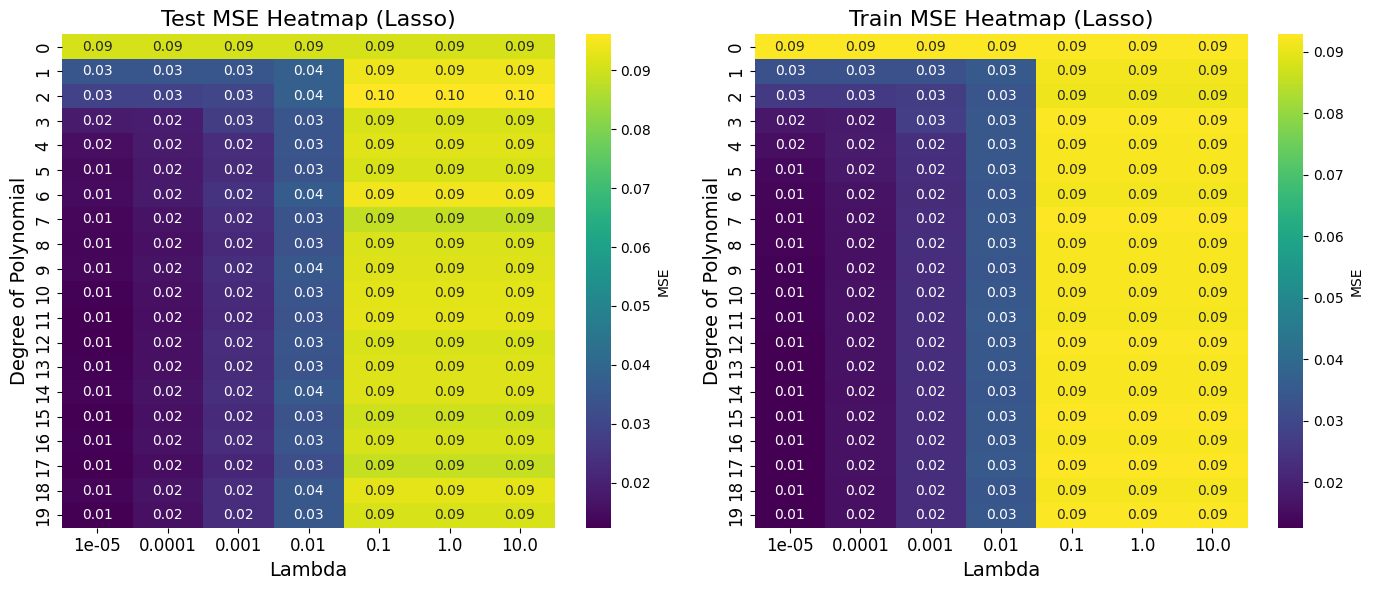

In [10]:
# create the heatmaps
plt.figure(figsize=(14, 6))

# Heatmap for MSE Lasso
plt.subplot(1, 2, 1)
sns.heatmap(MSElasso_test, annot=True, fmt=".2f", cmap='viridis',
            xticklabels=lm_val, yticklabels=range(maxdegree),
            cbar_kws={'label': 'MSE'})
plt.title('Test MSE Heatmap (Lasso)', fontsize=16)
plt.xlabel('Lambda', fontsize=14)
plt.ylabel('Degree of Polynomial', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Heatmap for MSE Lasso
plt.subplot(1, 2, 2)
sns.heatmap(MSElasso_train, annot=True, fmt=".2f", cmap='viridis',
            xticklabels=lm_val, yticklabels=range(maxdegree),
            cbar_kws={'label': 'MSE'})
plt.title('Train MSE Heatmap (Lasso)', fontsize=16)
plt.xlabel('Lambda', fontsize=14)
plt.ylabel('Degree of Polynomial', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
plt.show()


# Bias-variance trade-off (OLS)


In [11]:
np.random.seed(7935)

#create vectors to store data
polydegree = np.zeros(maxdegree)
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)

n_boostraps = 200 #choose the number of bootstraps

for i in range(maxdegree):
    X = design_matrix(x, y, i)
    X_train, X_test, f_train, f_test = train_test_split(X, f, test_size=0.2)
    f_pred = np.empty((f_test.shape[0], n_boostraps))
    for j in range(n_boostraps):
        X_, f_ = resample(X_train, f_train)
        beta_resampled = calcuateB(X_, f_)
        f_pred[:, j] = X_test @ beta_resampled

    polydegree[i] = i
    #error[i] = np.mean( np.mean((f_test - f_pred)**2, axis=1, keepdims=True) )
    error[i] = np.mean(np.mean((f_test[:, np.newaxis] - f_pred)**2, axis=1, keepdims=True))
    bias[i] = np.mean( (f_test[:, np.newaxis] - np.mean(f_pred, axis=1, keepdims=True))**2 )
    variance[i] = np.mean( np.var(f_pred, axis=1, keepdims=True))
    print(f"Degree: {i}")
    print(f"MSE: {error[i]}")
    print(f"Bias: {bias[i]}")
    print(f"Variance: {variance[i]}")
    print('{} >= {} + {} = {}'.format(error[i], bias[i], variance[i], bias[i]+variance[i]))
    print("-" * 30)




Degree: 0
MSE: 0.09068024850759958
Bias: 0.09066818777906507
Variance: 1.2060728534510095e-05
0.09068024850759958 >= 0.09066818777906507 + 1.2060728534510095e-05 = 0.09068024850759958
------------------------------
Degree: 1
MSE: 0.03261697773445671
Bias: 0.03260341980668004
Variance: 1.3557927776678497e-05
0.03261697773445671 >= 0.03260341980668004 + 1.3557927776678497e-05 = 0.032616977734456716
------------------------------
Degree: 2
MSE: 0.02624709013067509
Bias: 0.02622405415518658
Variance: 2.3035975488512218e-05
0.02624709013067509 >= 0.02622405415518658 + 2.3035975488512218e-05 = 0.02624709013067509
------------------------------
Degree: 3
MSE: 0.017060636303633792
Bias: 0.017039410197688457
Variance: 2.1226105945333916e-05
0.017060636303633792 >= 0.017039410197688457 + 2.1226105945333916e-05 = 0.017060636303633792
------------------------------
Degree: 4
MSE: 0.014099326432973928
Bias: 0.014071413724515341
Variance: 2.791270845858658e-05
0.014099326432973928 >= 0.0140714137245

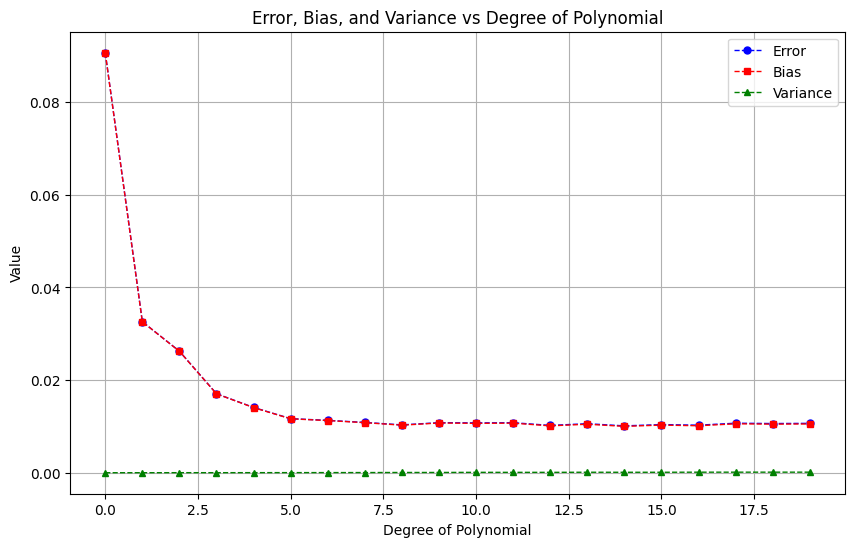

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(polydegree, error, label='Error', color='blue', marker='o', linestyle='--', markersize=5, linewidth=1)
plt.plot(polydegree, bias, label='Bias', color='red', marker='s', linestyle='--', markersize=5, linewidth=1)
plt.plot(polydegree, variance, label='Variance', color='green', marker='^', linestyle='--', markersize=5, linewidth=1)

plt.xlabel('Degree of Polynomial')
plt.ylabel('Value')
plt.title('Error, Bias, and Variance vs Degree of Polynomial')
plt.legend()
plt.grid(True)
plt.show()


# Cross- validation

## OLS

K=4, Train MSE: 0.010331679276807554, Test MSE: 3.829126993226329
K=4, Train MSE: 0.010405201117798739, Test MSE: 0.01126709764336853
K=4, Train MSE: 0.010219678276672802, Test MSE: 0.01216417725265233
K=4, Train MSE: 0.010323287955232727, Test MSE: 15.387433163414746
K=5, Train MSE: 0.01031978756256922, Test MSE: 5.096218416798706
K=5, Train MSE: 0.010400034659284857, Test MSE: 0.011430292559967654
K=5, Train MSE: 0.010375346947177271, Test MSE: 0.011335090393006866
K=5, Train MSE: 0.010336696297488651, Test MSE: 0.011101311687636053
K=5, Train MSE: 0.010395911875722095, Test MSE: 1.4643292744997094
K=6, Train MSE: 0.010336228725637352, Test MSE: 1.2295677053019733
K=6, Train MSE: 0.010440123765542786, Test MSE: 0.010881490236354551
K=6, Train MSE: 0.010410034896390674, Test MSE: 0.01098777100377108
K=6, Train MSE: 0.010290394075710259, Test MSE: 0.01196715064631504
K=6, Train MSE: 0.010334285595321893, Test MSE: 0.011631902579966375
K=6, Train MSE: 0.010414017633780012, Test MSE: 0.3

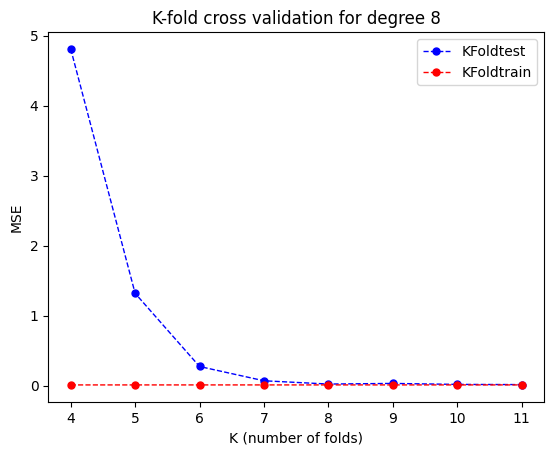

In [13]:
deg = 8

np.random.seed(7935)
X = design_matrix(x, y, deg)

#create a k(number of folds) vector
K =[4,5,6,7, 8,9,10,11]

estimated_mse_KFold_test = []
estimated_mse_KFold_train = []

#loop on different values of k
for k in K:
  kfold = KFold(n_splits = k)
  scores_KFold_test = []
  scores_KFold_train = []
  for train_inds, test_inds in kfold.split(X):
    Xtrain = X[train_inds]
    ftrain = f[train_inds]
    Xtest = X[test_inds]
    ftest = f[test_inds]
    beta = calcuateB(Xtrain, ftrain)
    fpred = Xtest @ beta
    ftilde = Xtrain @ beta

    mse_test = calculateMSE(ftest, fpred)
    mse_train = calculateMSE(ftrain, ftilde)

    scores_KFold_test.append(calculateMSE(ftest, fpred))
    scores_KFold_train.append(calculateMSE(ftrain, ftilde))

    print(f"K={k}, Train MSE: {mse_train}, Test MSE: {mse_test}")

  estimated_mse_KFold_test.append(np.mean(scores_KFold_test)) # Append the mean to the list
  estimated_mse_KFold_train.append(np.mean(scores_KFold_train)) # Append the mean to the list

print (estimated_mse_KFold_test)
plt.figure()
plt.title(f'K-fold cross validation for degree {deg}')
plt.plot(K, estimated_mse_KFold_test, color='blue', marker='o', linestyle='--', markersize=5, linewidth=1, label = 'KFoldtest')
plt.plot(K, estimated_mse_KFold_train, color='red', marker='o', linestyle='--', markersize=5, linewidth=1, label = 'KFoldtrain')
plt.xlabel('K (number of folds)')
plt.ylabel('MSE')
#plt.ylim(-100, 1700)
plt.legend()
plt.show()


## Ridge

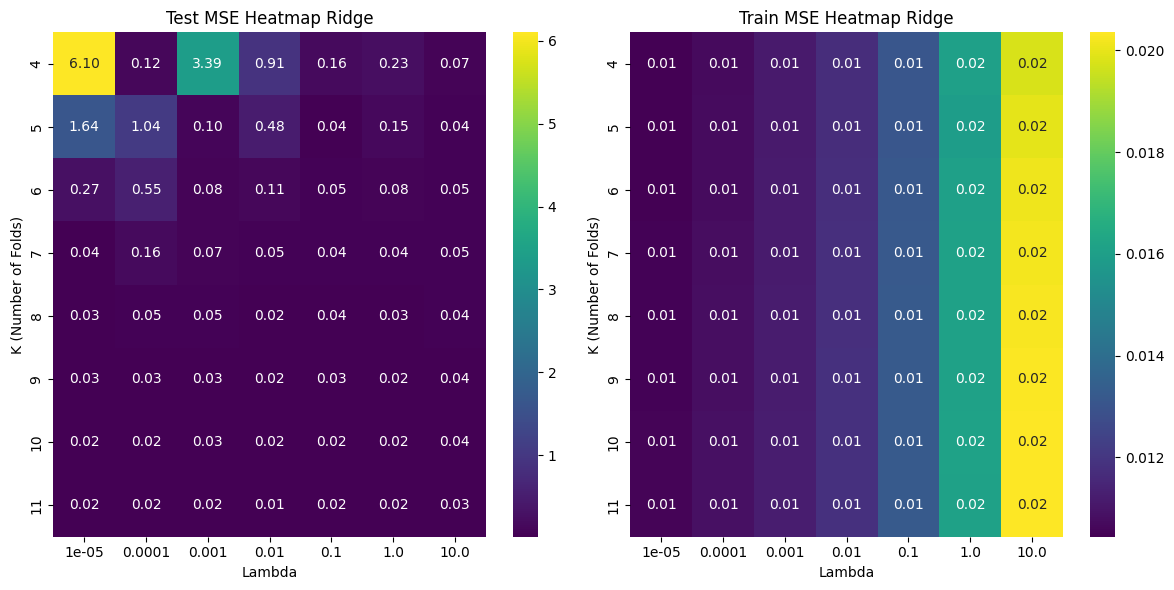

In [14]:

np.random.seed(7935)
deg = 13
X = design_matrix(x, y, deg)

lm_val = [1e-5, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0] #lambda values
K = [4, 5, 6, 7, 8, 9, 10, 11]  # k values

#create vector to store datas
mse_test = np.zeros((len(K), len(lm_val)))
mse_train = np.zeros((len(K), len(lm_val)))

# K-Fold Cross-Validation
for k_index, k in enumerate(K):
    kfold = KFold(n_splits=k)

    for l_index, lmd in enumerate(lm_val):
        scores_KFold_test = []
        scores_KFold_train = []

        for train_inds, test_inds in kfold.split(X):
            Xtrain = X[train_inds]
            ftrain = f[train_inds]
            Xtest = X[test_inds]
            ftest = f[test_inds]
            beta = betaRIDGE(Xtrain, ftrain, lmd)
            fpred = Xtest @ beta
            ftilde = Xtrain @ beta
            scores_KFold_test.append(calculateMSE(ftest, fpred))
            scores_KFold_train.append(calculateMSE(ftrain, ftilde))
        mse_test[k_index, l_index] = np.mean(scores_KFold_test)
        mse_train[k_index, l_index] = np.mean(scores_KFold_train)

# Heatmap
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(mse_test, annot=True, fmt=".2f", cmap='viridis', xticklabels=lm_val, yticklabels=K)
plt.title('Test MSE Heatmap Ridge')
plt.xlabel('Lambda')
plt.ylabel('K (Number of Folds)')

plt.subplot(1, 2, 2)
sns.heatmap(mse_train, annot=True, fmt=".2f", cmap='viridis', xticklabels=lm_val, yticklabels=K)
plt.title('Train MSE Heatmap Ridge')
plt.xlabel('Lambda')
plt.ylabel('K (Number of Folds)')

plt.tight_layout()
plt.show()


## Lasso

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.149e-01, tolerance: 2.309e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.285e-01, tolerance: 2.515e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.678e-01, tolerance: 3.271e

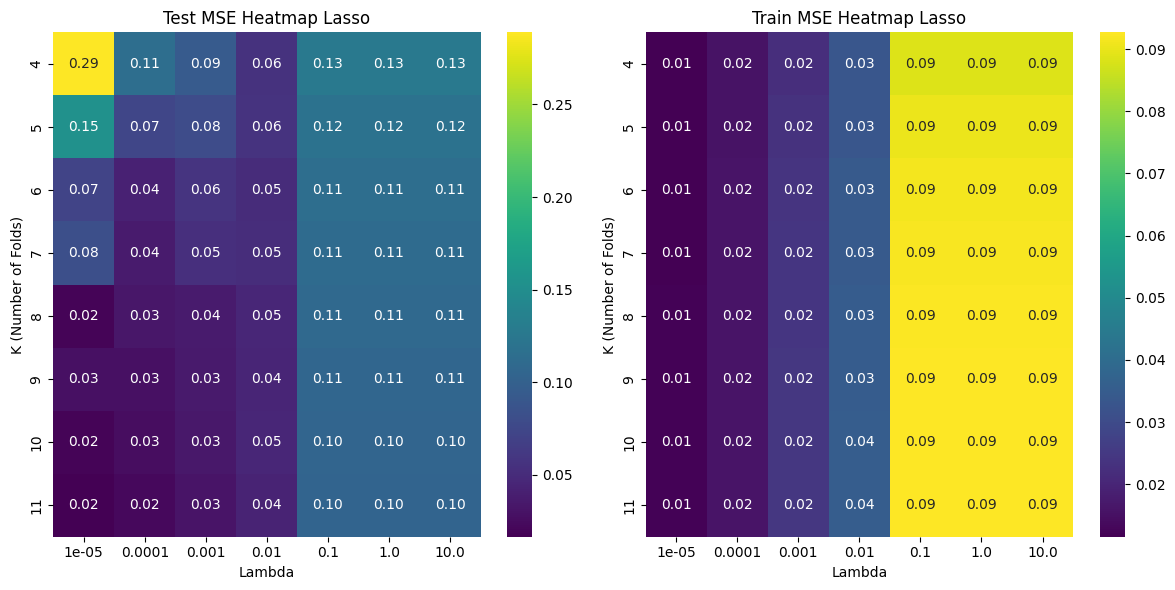

In [8]:
np.random.seed(7935)
deg = 13
X = design_matrix(x, y, deg)

lm_val = [1e-5, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0] #lambda values
K = [4, 5, 6, 7, 8, 9, 10, 11]  # k values

mse_test = np.zeros((len(K), len(lm_val)))
mse_train = np.zeros((len(K), len(lm_val)))

# K-Fold Cross-Validation
for k_index, k in enumerate(K):
    kfold = KFold(n_splits=k)

    for l_index, lmd in enumerate(lm_val):
        scores_KFold_test = []
        scores_KFold_train = []

        for train_inds, test_inds in kfold.split(X):
            Xtrain = X[train_inds]
            ftrain = f[train_inds]
            Xtest = X[test_inds]
            ftest = f[test_inds]

            RegLasso = linear_model.Lasso(lmd,fit_intercept=True, max_iter=10000)
            RegLasso.fit(Xtrain,ftrain)
            fpred = RegLasso.predict(Xtest)
            ftilde = RegLasso.predict(Xtrain)

            scores_KFold_test.append(calculateMSE(ftest, fpred))
            scores_KFold_train.append(calculateMSE(ftrain, ftilde))

        mse_test[k_index, l_index] = np.mean(scores_KFold_test)
        mse_train[k_index, l_index] = np.mean(scores_KFold_train)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(mse_test, annot=True, fmt=".2f", cmap='viridis', xticklabels=lm_val, yticklabels=K)
plt.title('Test MSE Heatmap Lasso')
plt.xlabel('Lambda')
plt.ylabel('K (Number of Folds)')

plt.subplot(1, 2, 2)
sns.heatmap(mse_train, annot=True, fmt=".2f", cmap='viridis', xticklabels=lm_val, yticklabels=K)
plt.title('Train MSE Heatmap Lasso')
plt.xlabel('Lambda')
plt.ylabel('K (Number of Folds)')

plt.tight_layout()
plt.show()

# Terrain data

<ipython-input-15-a2d9626f87be>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  terrain = imread('SRTM_data_Norway_1.tif')


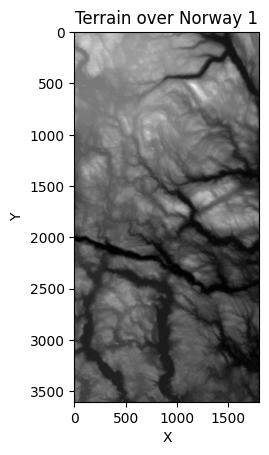

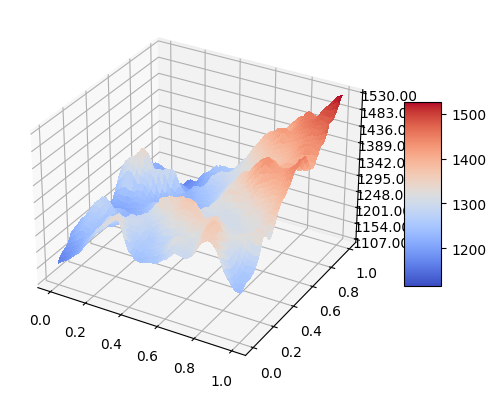

<Figure size 2000x2000 with 0 Axes>

In [15]:
terrain = imread('SRTM_data_Norway_1.tif')
np.random.seed(7935)
# Show the terrain in 2D
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(terrain, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Size of the subset
N = 100

# Use a subset of the terrain data for analysis
terrain_subset = terrain[:N, :N]
z_shape = np.shape(terrain_subset)

# Create meshgrid for the subset
x = np.linspace(0, 1, z_shape[0])
y = np.linspace(0, 1, z_shape[1])
x, y = np.meshgrid(x, y)
z = terrain_subset

# Create a 3D plot
fig = plt.figure()
plt.figure(figsize=(20, 20))

ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis
ax.set_zlim(np.min(z), np.max(z))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

#flatten the datas into arrays
x = x.flatten()
y = y.flatten()
f = z.flatten()

## OLS


Degree: 0
MSE Train Data: 0.9999999999999999
MSE Test Data: 1.0328207072704763
R2 Train Data: -2.220446049250313e-16
R2 Test Data: -0.00014744602414507035
------------------------------
Degree: 1
MSE Train Data: 0.3626297647763846
MSE Test Data: 0.374761754018998
R2 Train Data: 0.6373702352236155
R2 Test Data: 0.622326682333525
------------------------------
Degree: 2
MSE Train Data: 0.20688769129452012
MSE Test Data: 0.21169695898021573
R2 Train Data: 0.7931123087054799
R2 Test Data: 0.7879673101307821
------------------------------
Degree: 3
MSE Train Data: 0.14044648603003607
MSE Test Data: 0.1518713351439213
R2 Train Data: 0.8595535139699639
R2 Test Data: 0.8477926050841678
------------------------------
Degree: 4
MSE Train Data: 0.10978717569951342
MSE Test Data: 0.11146326110047383
R2 Train Data: 0.8902128243004865
R2 Test Data: 0.8808166916361337
------------------------------
Degree: 5
MSE Train Data: 0.09487005852698124
MSE Test Data: 0.09764835029360794
R2 Train Data: 0.90512

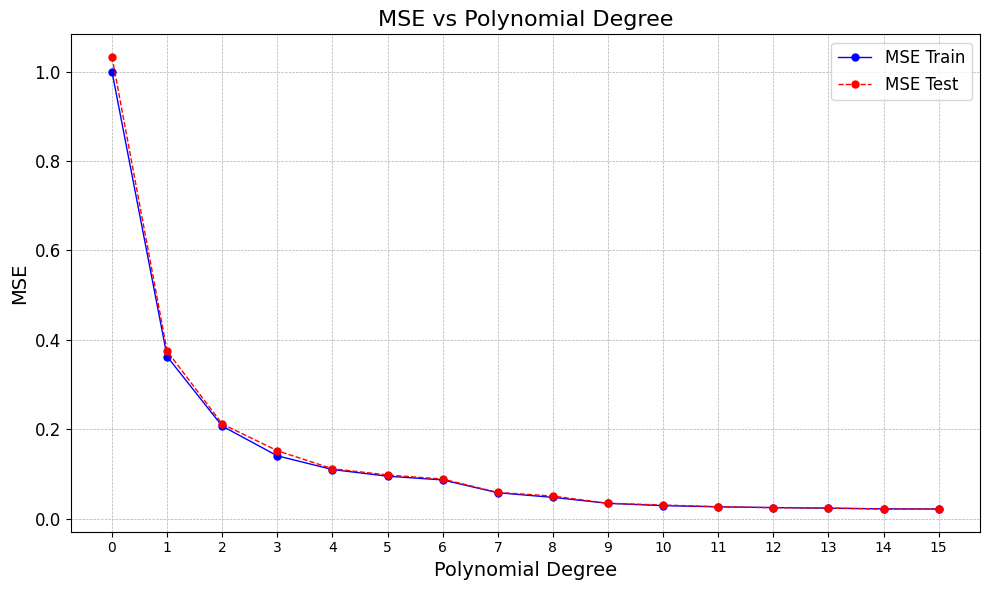

In [16]:

#create vectors to store data
maxdegree = 16
np.random.seed(7935)
polydegree = np.zeros(maxdegree)
MSE_train = np.zeros(maxdegree)
MSE_test = np.zeros(maxdegree)
R2_train = np.zeros(maxdegree)
R2_test = np.zeros(maxdegree)

# for loop for every polynomial degree
for degree in range (maxdegree):

    # create design matrix
    X = design_matrix(x, y, degree)

    #divide into train and test data and scale
    X_train, X_test, f_train, f_test = split_and_scale(X, f)

    #calculate beta
    beta = calcuateB(X_train, f_train)

    ftilde = X_train @ beta
    fpred = X_test @ beta
    polydegree[degree] = degree
    MSE_train[degree] = calculateMSE(f_train, ftilde)
    MSE_test[degree] = calculateMSE(f_test, fpred)
    R2_train[degree] = R2(f_train, ftilde)
    R2_test[degree] = R2(f_test, fpred)

    print(f"Degree: {degree}")
    #print(f"Beta: {beta}")
    print(f"MSE Train Data: {MSE_train[degree]}")
    print(f"MSE Test Data: {MSE_test[degree]}")
    print(f"R2 Train Data: {R2_train[degree]}")
    print(f"R2 Test Data: {R2_test[degree]}")
    print("-" * 30)


# Plotting MSE values
plt.figure(figsize=(10, 6))
plt.plot(polydegree, MSE_train, label='MSE Train', marker='o', linestyle='-', color='blue',  markersize=5, linewidth=1)
plt.plot(polydegree, MSE_test, label='MSE Test', marker='o', linestyle='--', color='red',  markersize=5, linewidth=1)

plt.xlabel('Polynomial Degree', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.title('MSE vs Polynomial Degree', fontsize=16)
plt.xticks(polydegree)  # Ensure all polynomial degrees are shown
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()  # Adjust layout to fit labels and title
plt.show()




## Ridge

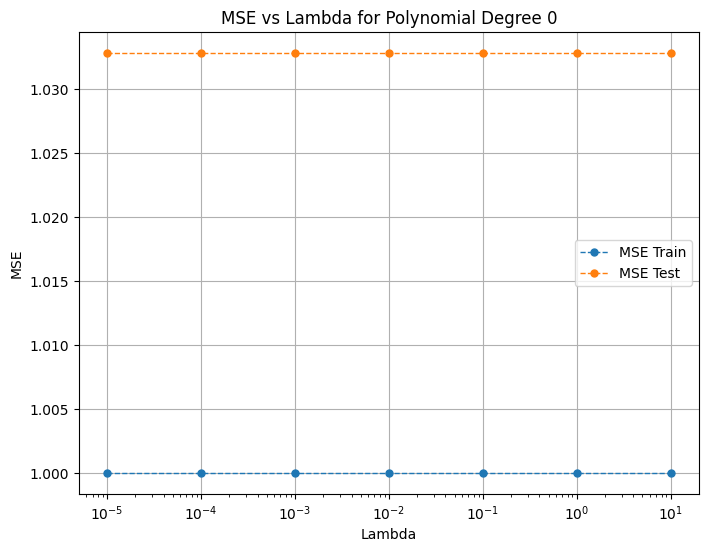

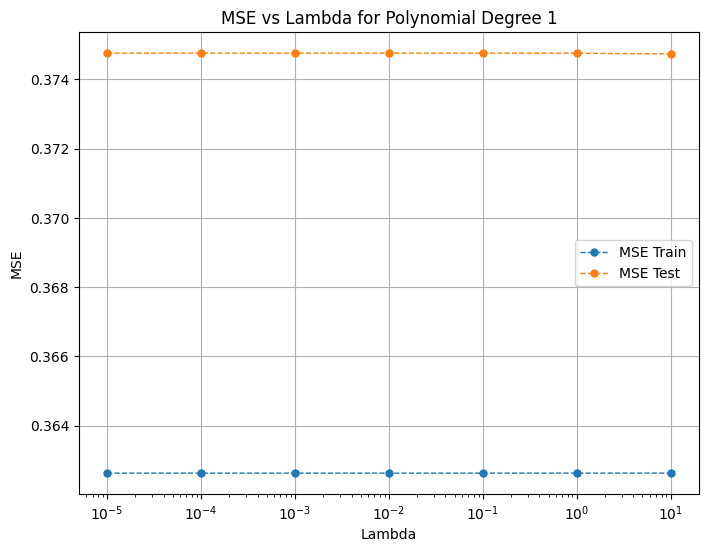

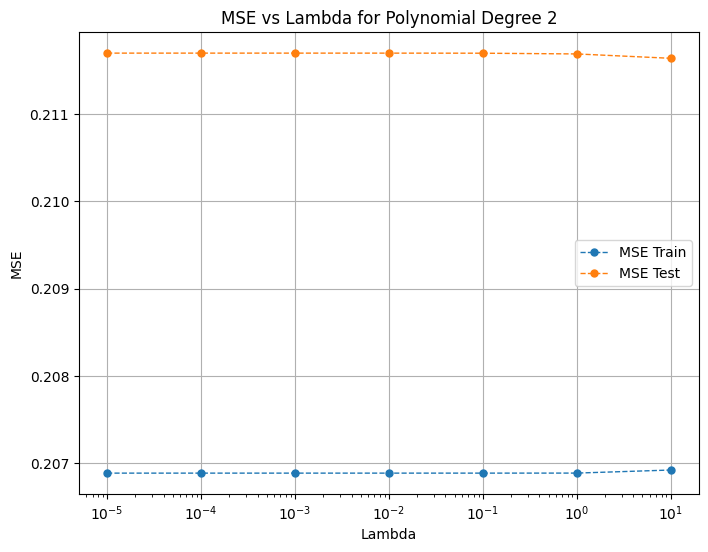

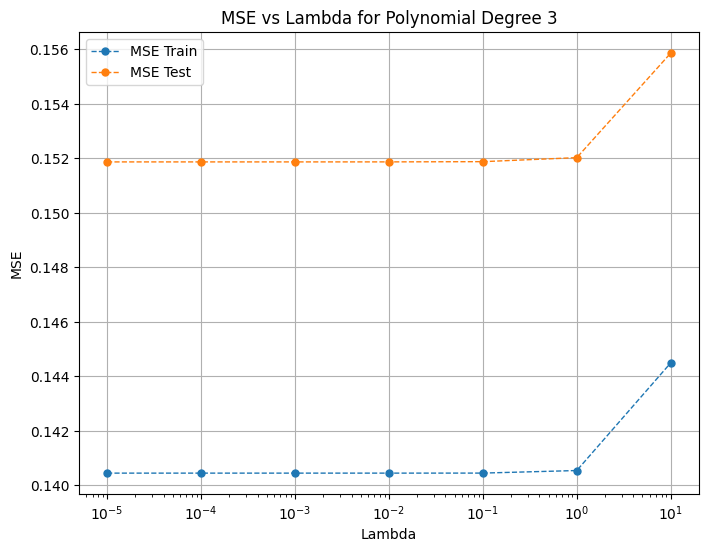

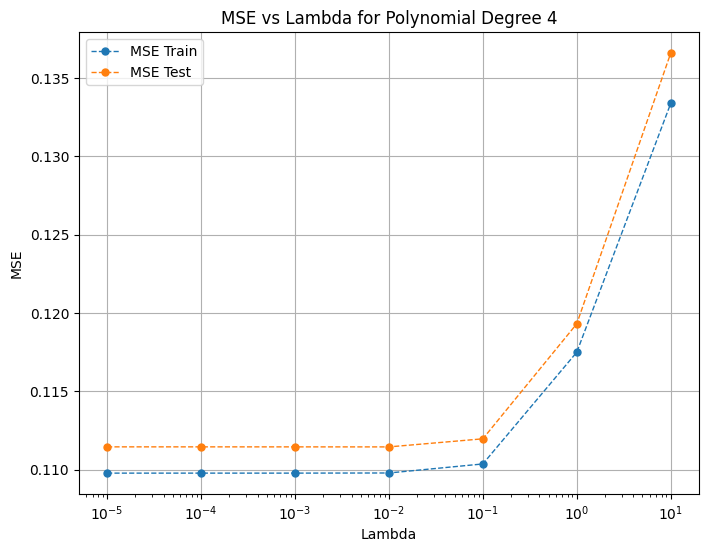

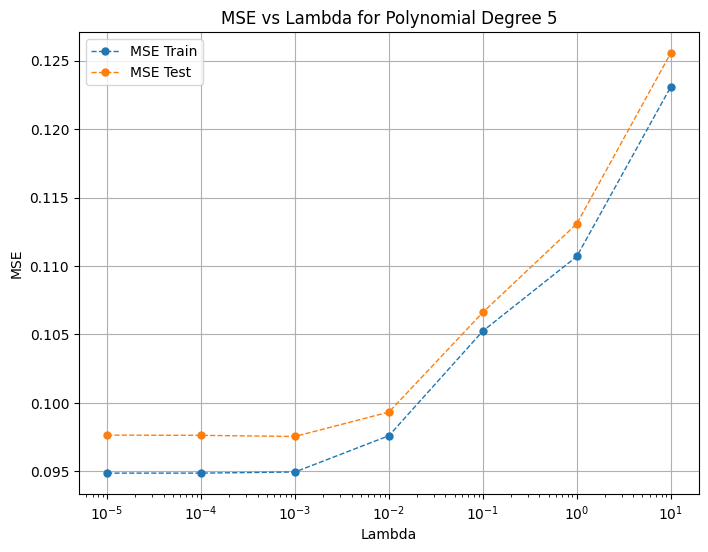

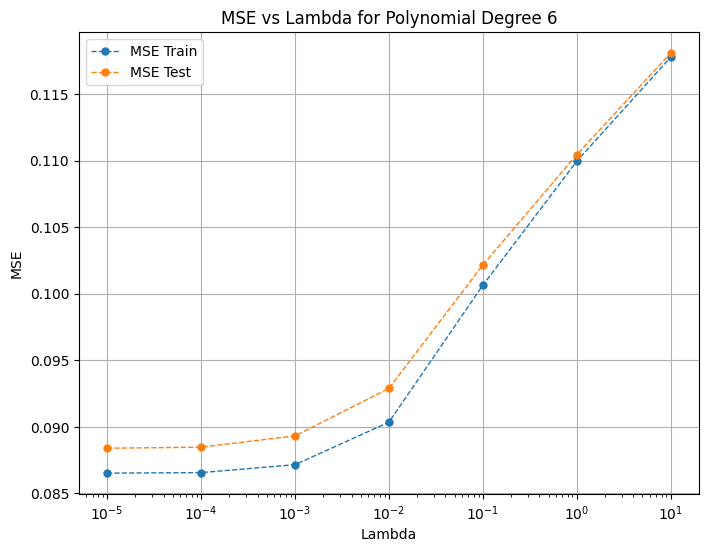

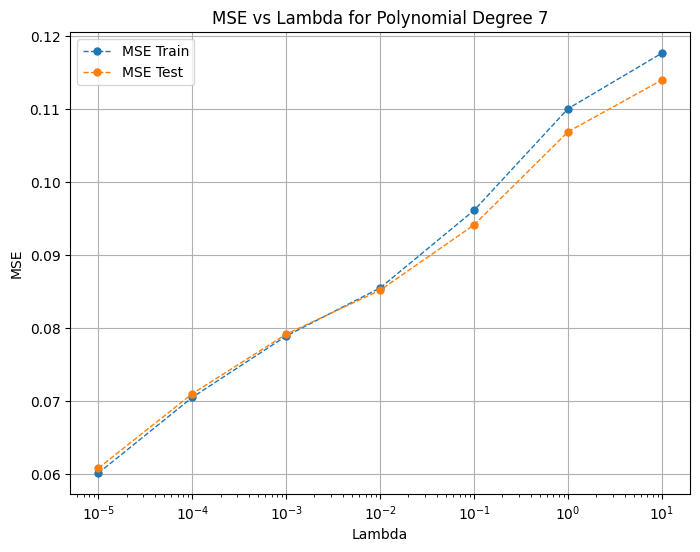

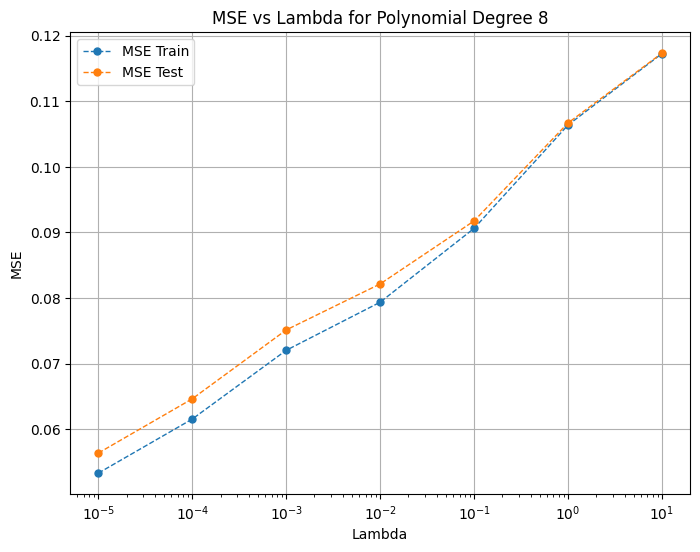

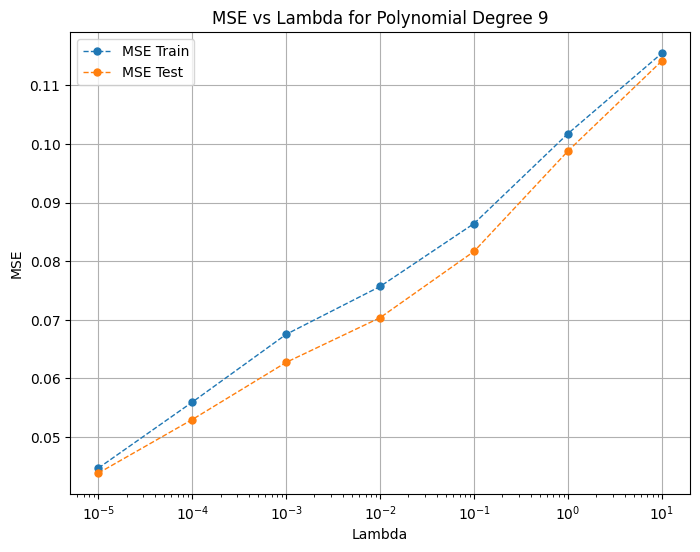

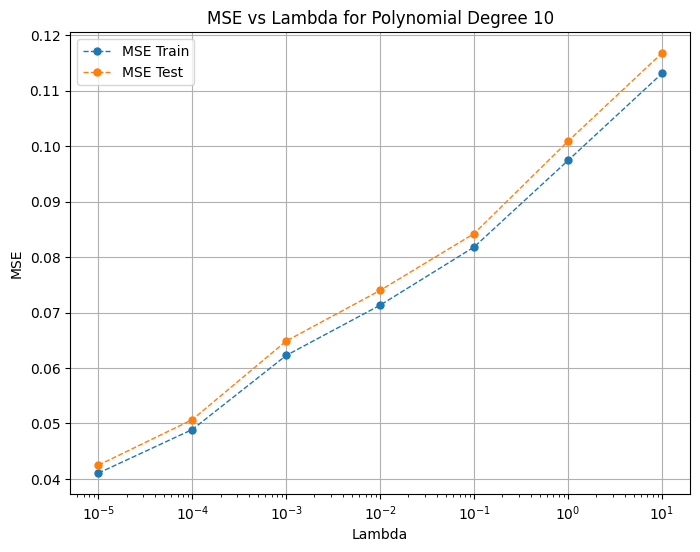

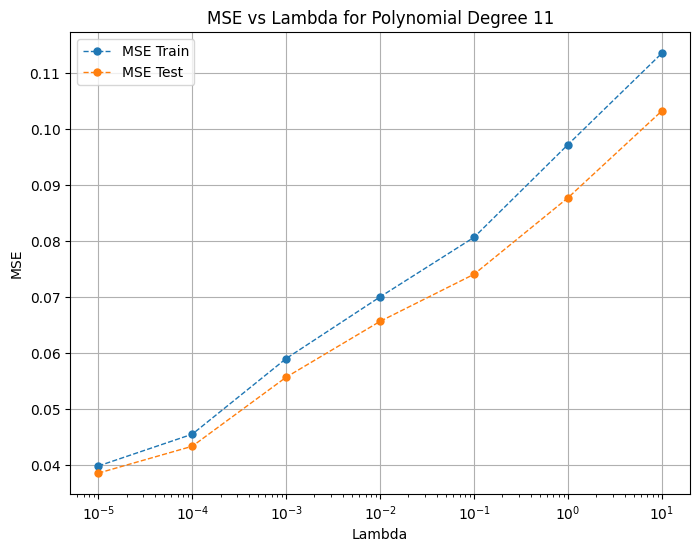

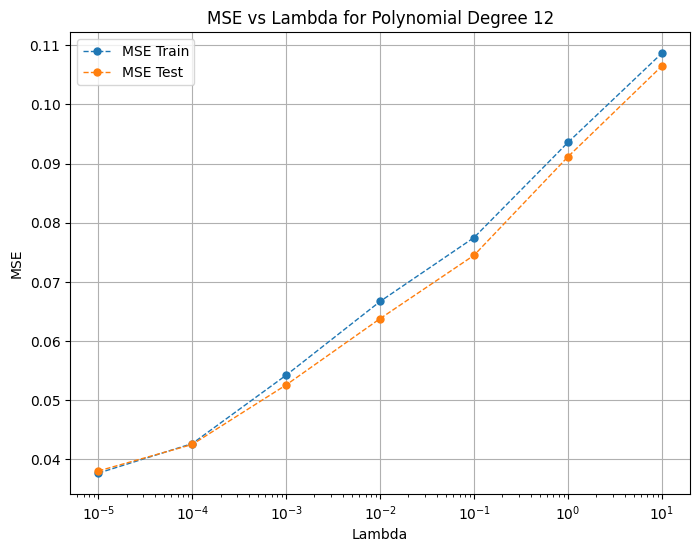

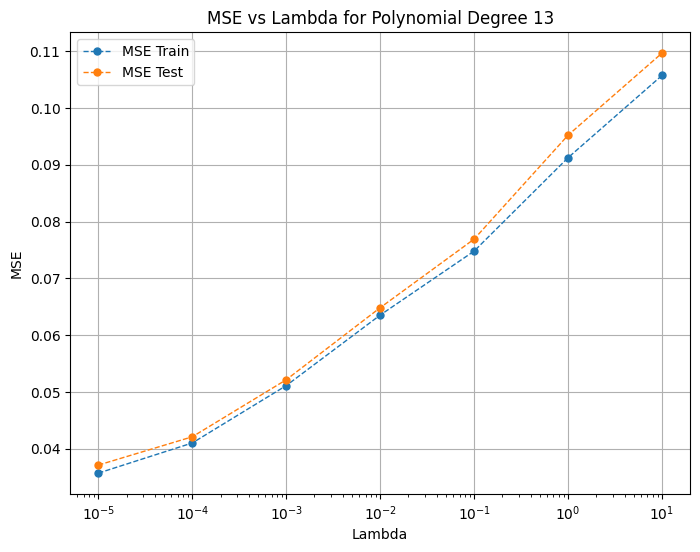

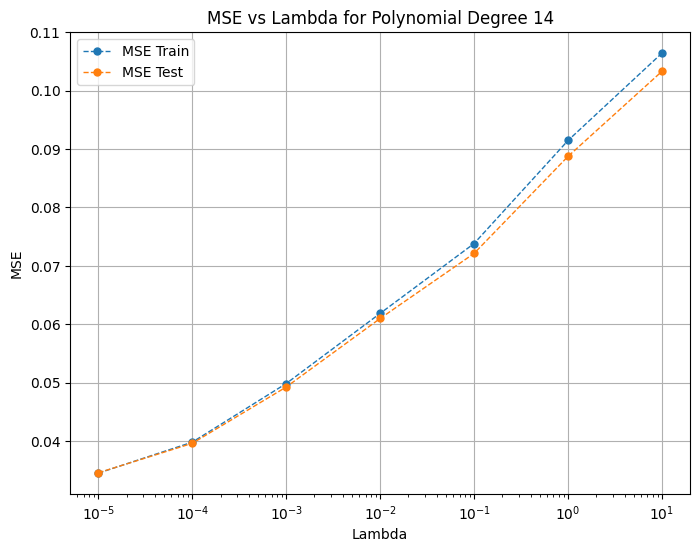

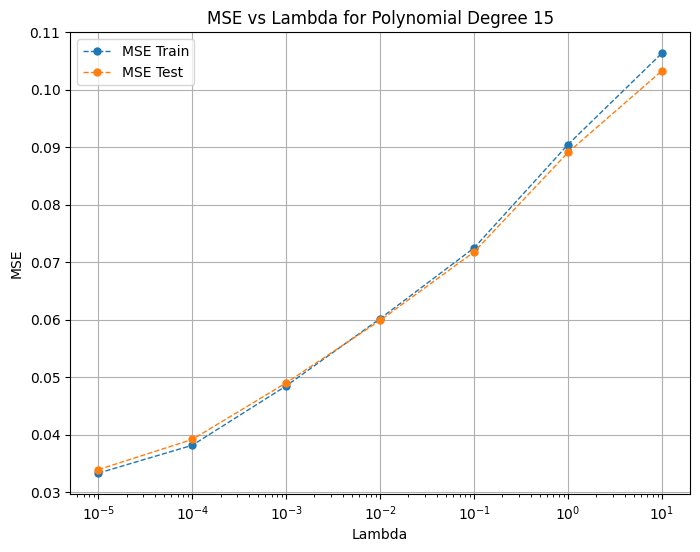

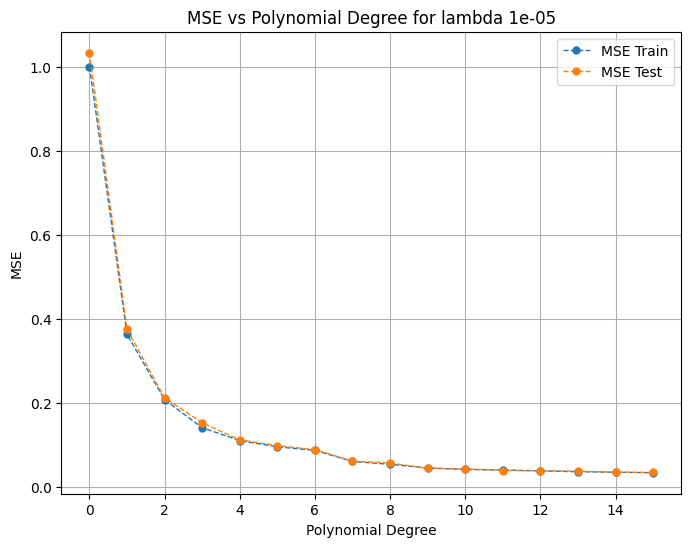

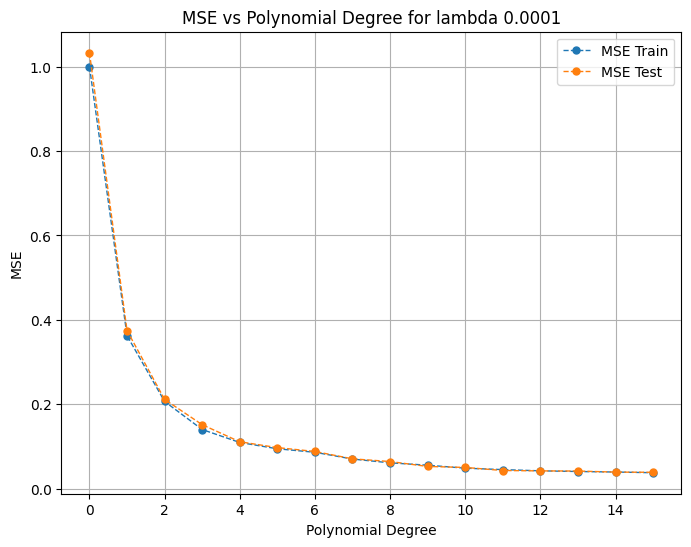

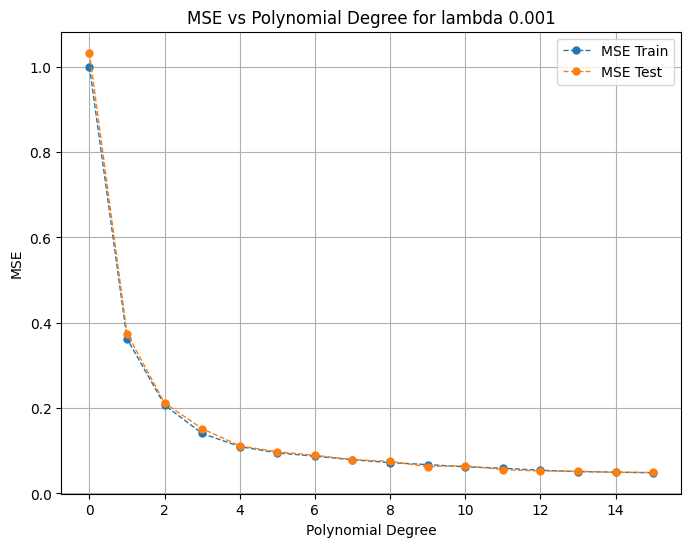

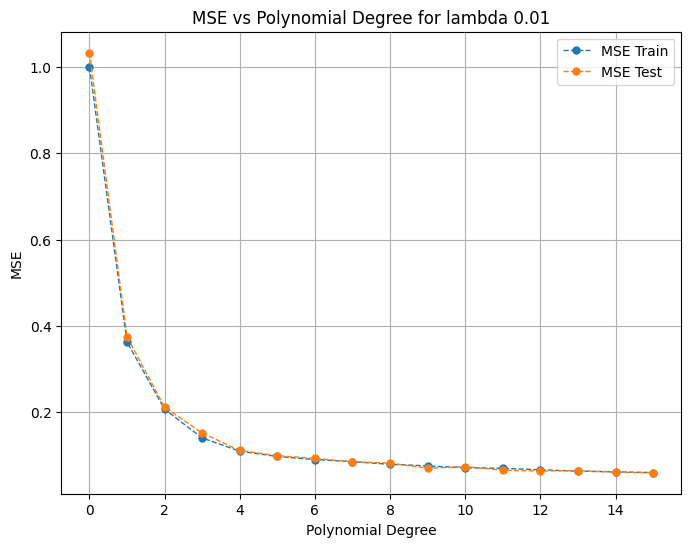

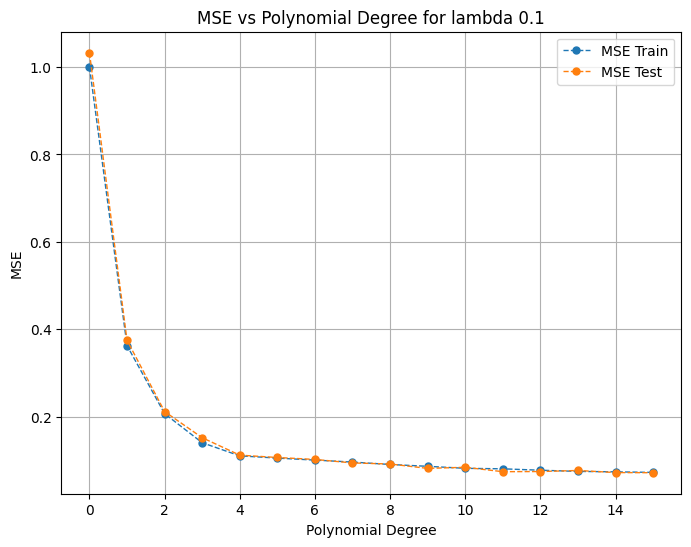

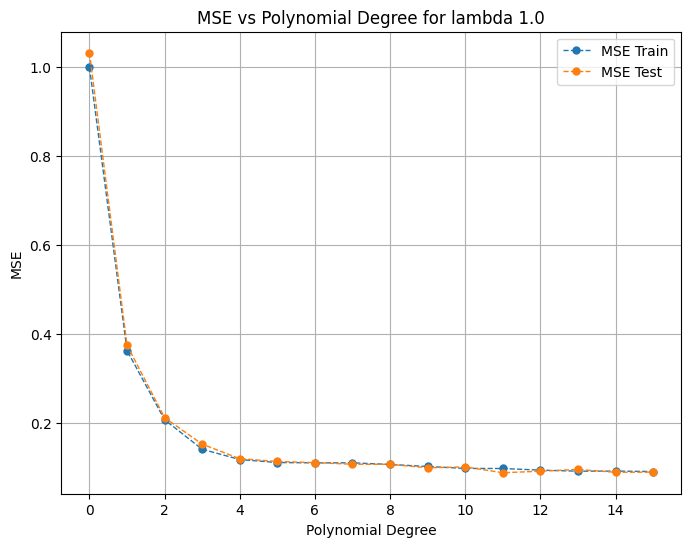

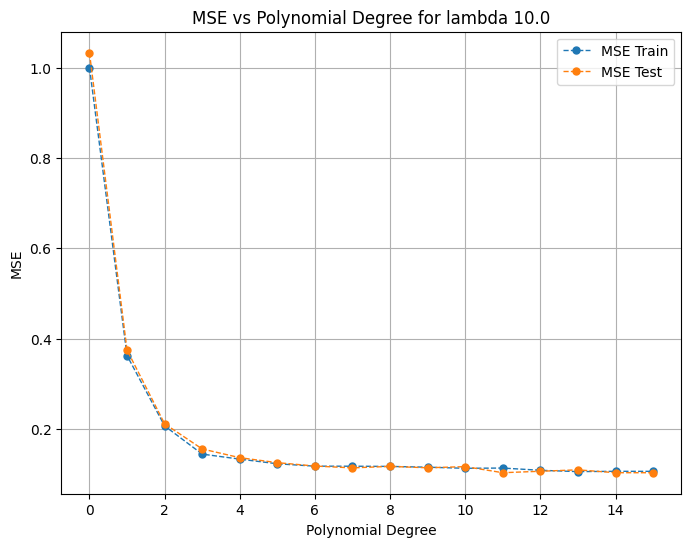

In [17]:
lm_val = [1e-5, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
np.random.seed(7935)
MSEridge_train = np.zeros((maxdegree,len(lm_val)))
MSEridge_test = np.zeros((maxdegree,len(lm_val)))
R2ridge_train = np.zeros((maxdegree,len(lm_val)))
R2ridge_test = np.zeros((maxdegree,len(lm_val)))

#start of the big loop
for i in range (maxdegree):
  X = design_matrix(x, y, i)
  X_train, X_test, f_train, f_test = split_and_scale(X, f)
  #polynomial ridge regression (both with my model and scikt)
  for j, lmd in enumerate(lm_val):
      betaridge = betaRIDGE(X_train, f_train, lmd)
      ftildeRidge = X_train @ betaridge
      fpredictRidge = X_test @ betaridge
      #fill the matrices
      MSEridge_train[i, j] = calculateMSE(f_train, ftildeRidge)
      MSEridge_test[i, j] = calculateMSE(f_test, fpredictRidge)
      R2ridge_train[i, j] = R2(f_train, ftildeRidge)
      R2ridge_test[i, j] = R2(f_test, fpredictRidge)

  if i in range(maxdegree):
      plt.figure(figsize=(8, 6))
      plt.plot(lm_val, MSEridge_train[i], label='MSE Train', marker='o', linestyle='--', markersize=5, linewidth=1)
      plt.plot(lm_val, MSEridge_test[i], label='MSE Test', marker='o', linestyle='--', markersize=5, linewidth=1)
      plt.xscale('log')
      plt.xlabel('Lambda')
      plt.ylabel('MSE')
      plt.title(f'MSE vs Lambda for Polynomial Degree {i}')
      plt.legend()
      plt.grid(True)
      plt.show()

for k, lmd in enumerate(lm_val):
    #if k in [1, 3]:
        plt.figure(figsize=(8, 6))
        plt.plot(polydegree, MSEridge_train[:,k], label='MSE Train', marker='o', linestyle='--', markersize=5, linewidth=1)
        plt.plot(polydegree, MSEridge_test[:,k], label='MSE Test', marker='o', linestyle='--', markersize=5, linewidth=1)
        plt.xlabel('Polynomial Degree')
        plt.ylabel('MSE')
        plt.title(f'MSE vs Polynomial Degree for lambda {lm_val[k]}')
        plt.legend()
        plt.grid(True)
        plt.show()


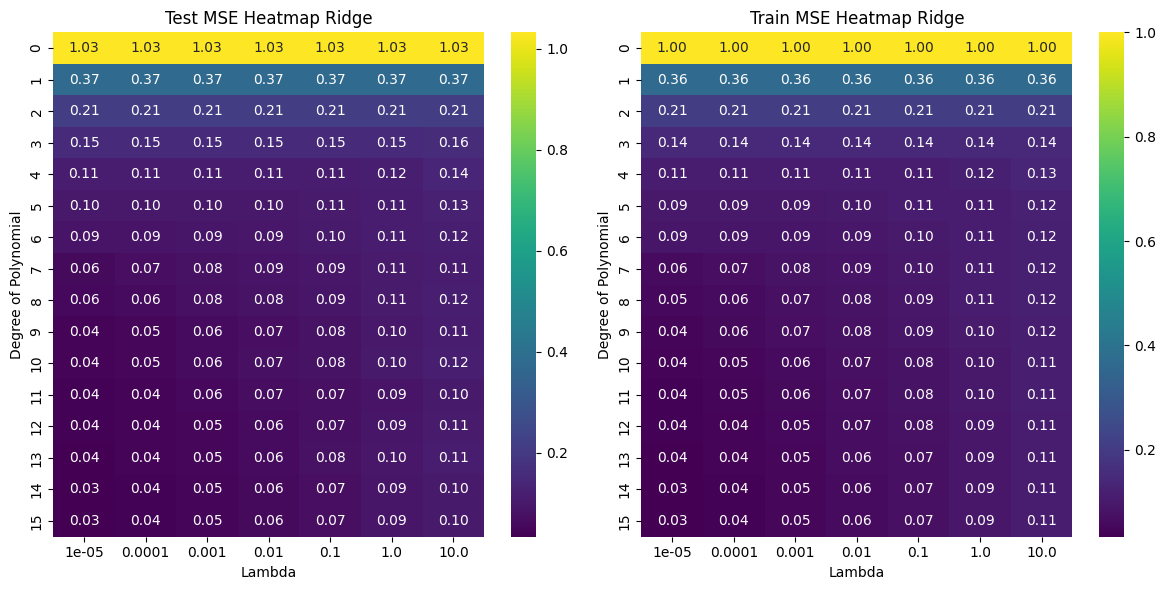

In [18]:
#create the heatmap for ridge regression
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(MSEridge_test, annot=True, fmt=".2f", cmap='viridis', xticklabels=lm_val, yticklabels=range(maxdegree) )
ax.set_aspect('equal', adjustable='box')
plt.title('Test MSE Heatmap Ridge')
plt.xlabel('Lambda')
plt.ylabel('Degree of Polynomial')

plt.subplot(1, 2, 2)
sns.heatmap(MSEridge_train, annot=True, fmt=".2f", cmap='viridis', xticklabels=lm_val, yticklabels=range(maxdegree))
plt.title('Train MSE Heatmap Ridge')
plt.xlabel('Lambda')
plt.ylabel('Degree of Polynomial')

plt.tight_layout()
plt.show()

## Lasso

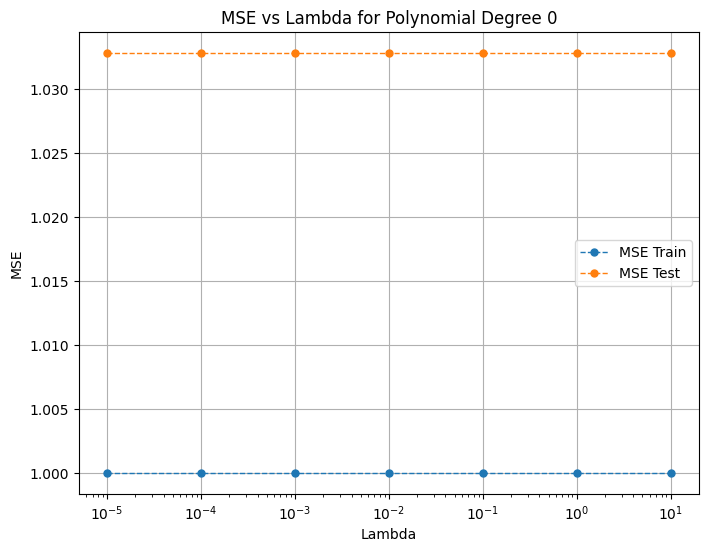

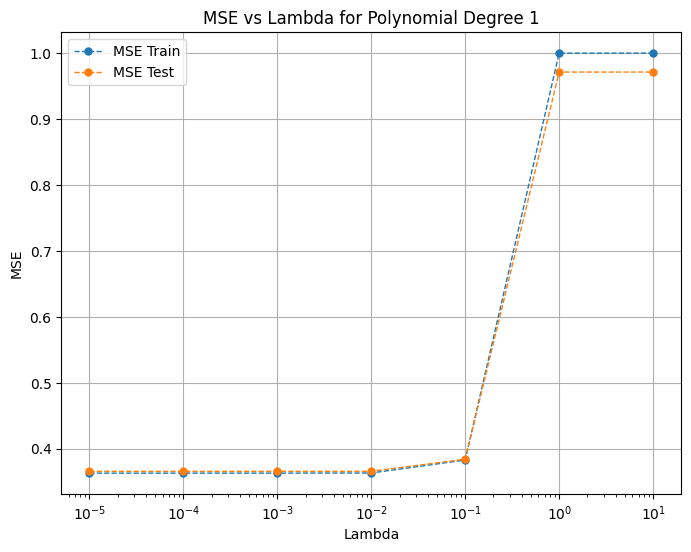

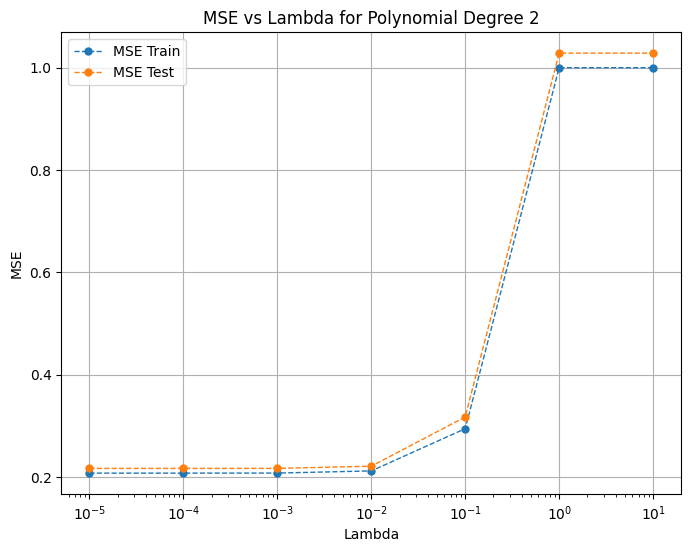

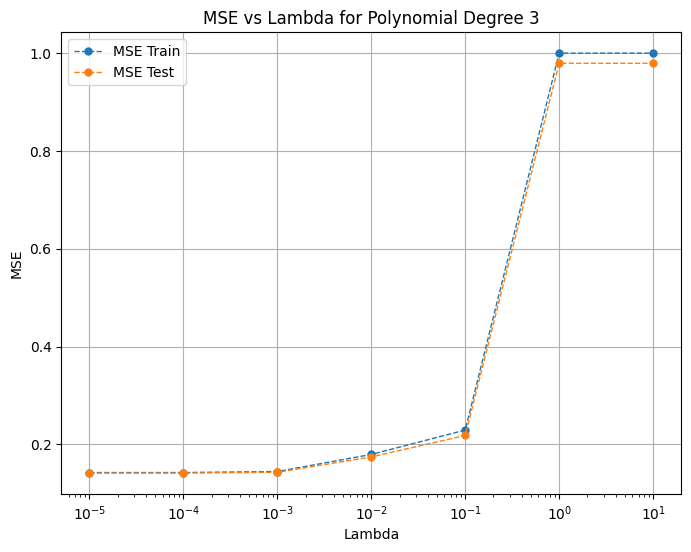

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.442e+02, tolerance: 8.000e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.887e+02, tolerance: 8.000e-01
  model = cd_fast.enet_coordinate_descent(


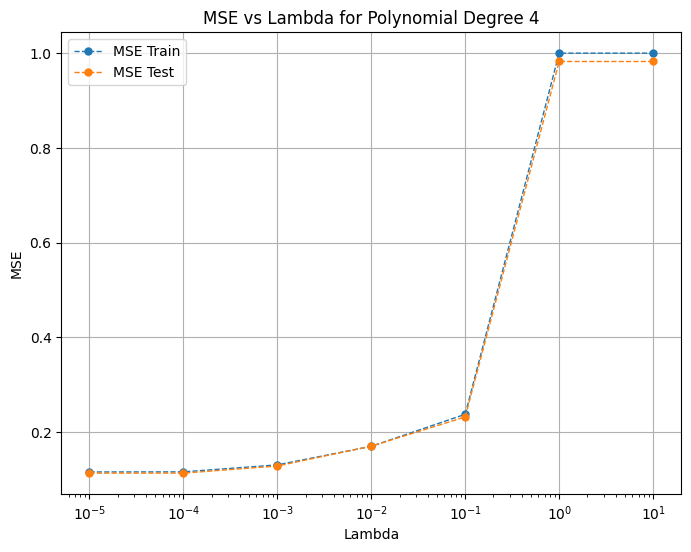

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.939e+02, tolerance: 8.000e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.458e+01, tolerance: 8.000e-01
  model = cd_fast.enet_coordinate_descent(


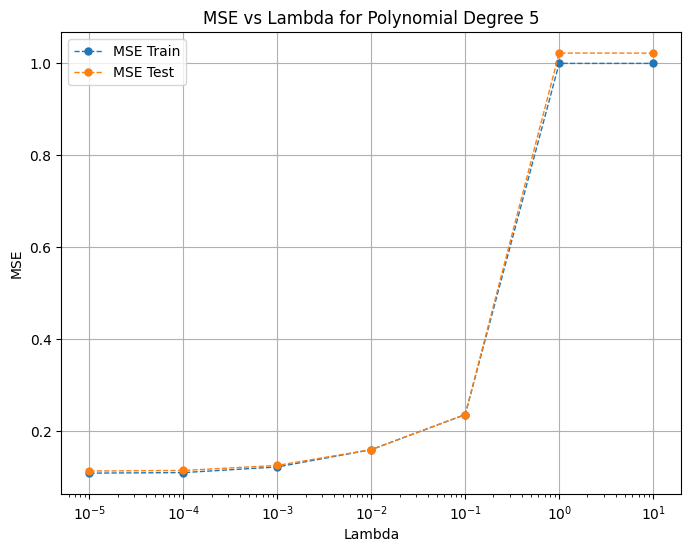

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.707e+02, tolerance: 8.000e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.668e+01, tolerance: 8.000e-01
  model = cd_fast.enet_coordinate_descent(


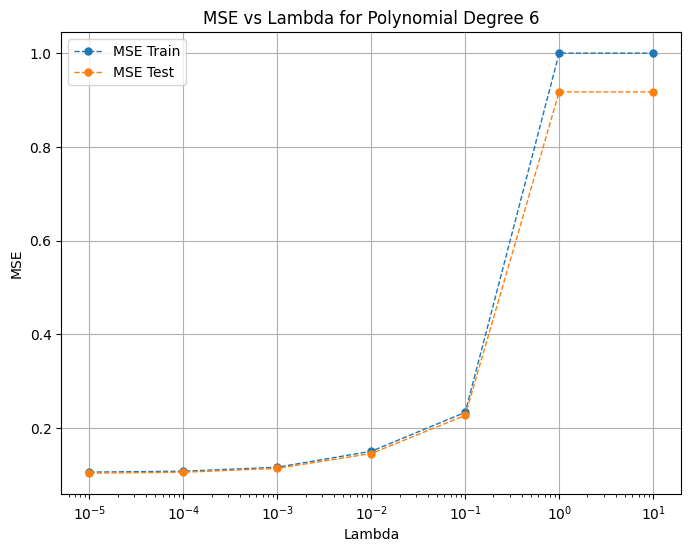

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.852e+02, tolerance: 8.000e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.093e+02, tolerance: 8.000e-01
  model = cd_fast.enet_coordinate_descent(


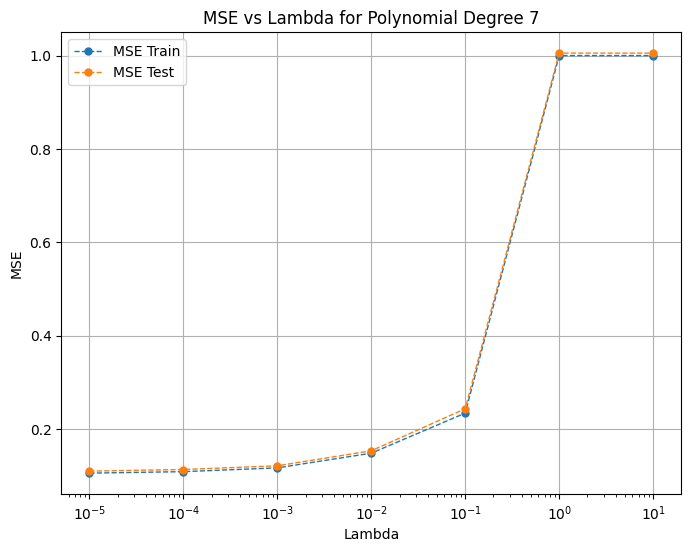

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.882e+02, tolerance: 8.000e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.087e+02, tolerance: 8.000e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.176e+00, tolerance: 8.000e

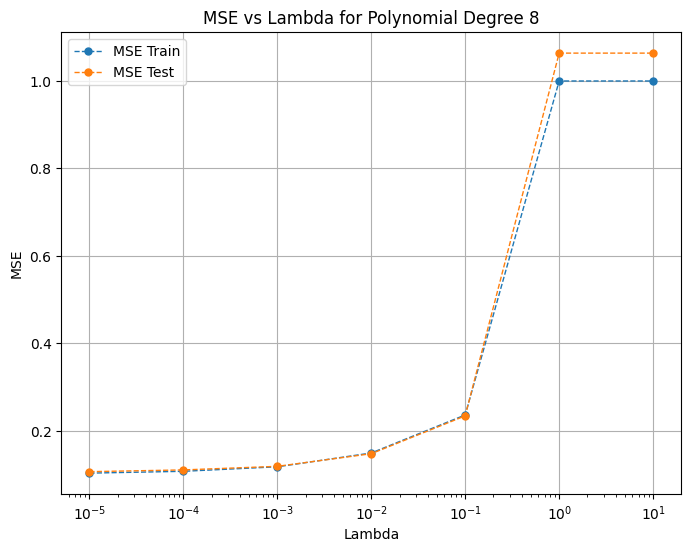

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.795e+02, tolerance: 8.000e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.052e+02, tolerance: 8.000e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.759e+00, tolerance: 8.000e

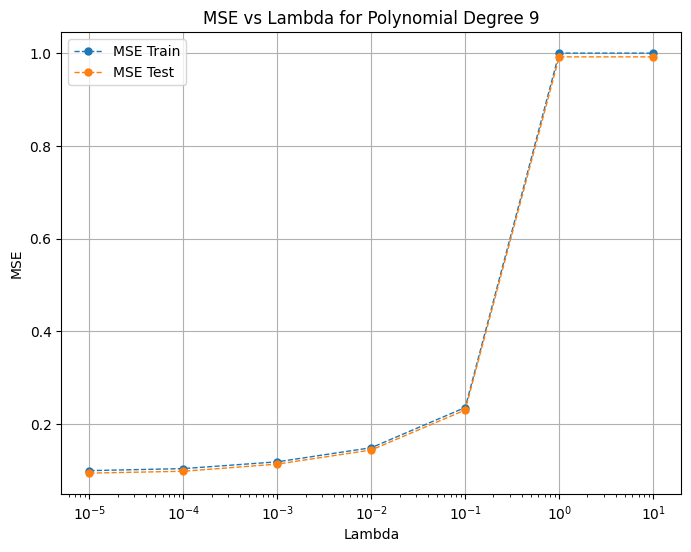

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.624e+02, tolerance: 8.000e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.167e+02, tolerance: 8.000e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.465e+00, tolerance: 8.000e

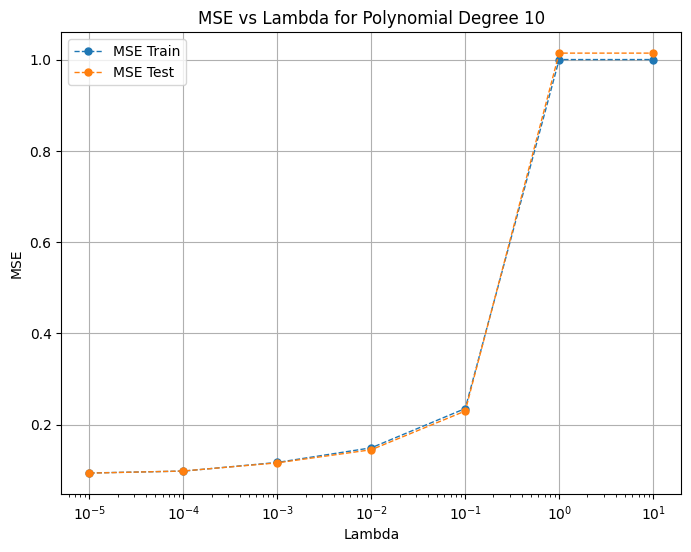

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.530e+02, tolerance: 8.000e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.019e+02, tolerance: 8.000e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.472e+00, tolerance: 8.000e

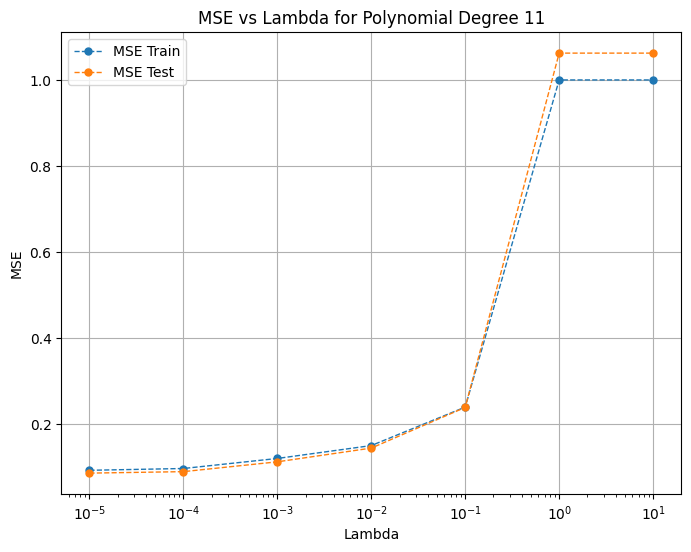

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.267e+02, tolerance: 8.000e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.648e+02, tolerance: 8.000e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.620e+00, tolerance: 8.000e

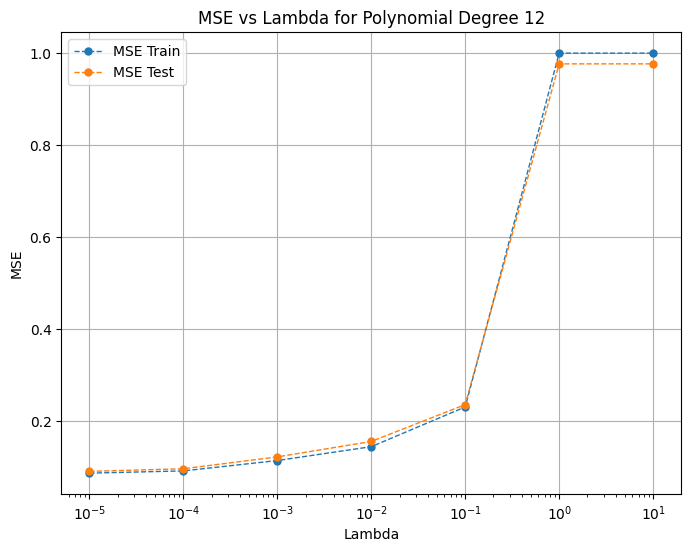

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.210e+02, tolerance: 8.000e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.464e+02, tolerance: 8.000e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.715e+00, tolerance: 8.000e

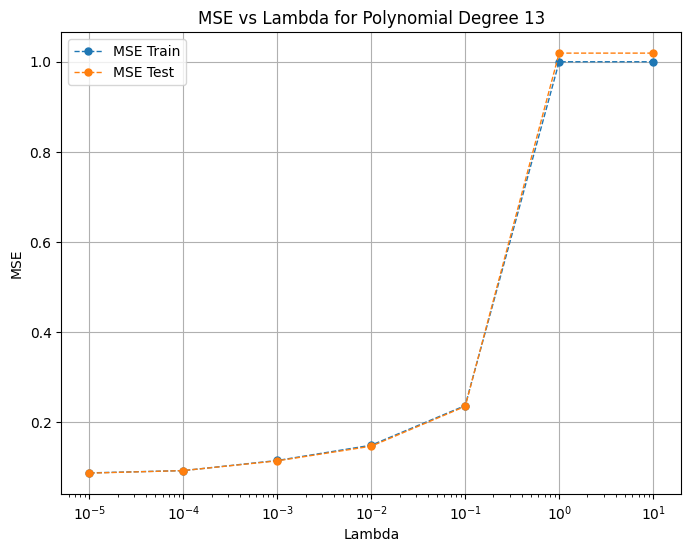

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.260e+02, tolerance: 8.000e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.652e+02, tolerance: 8.000e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.552e+00, tolerance: 8.000e

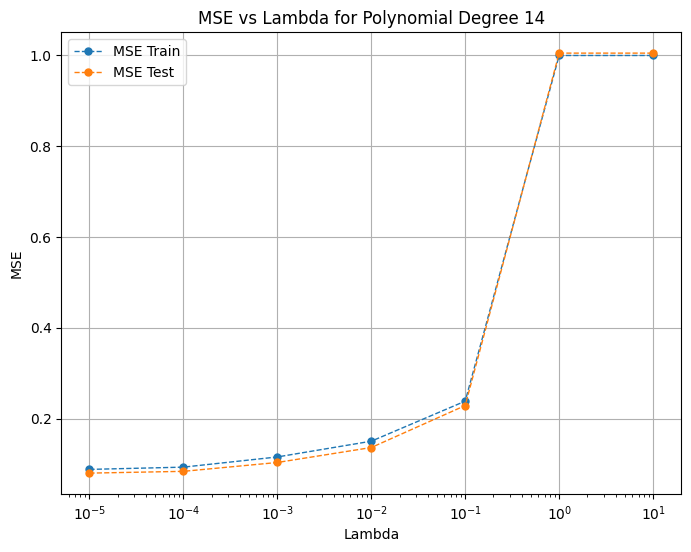

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.210e+02, tolerance: 8.000e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.702e+02, tolerance: 8.000e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.778e-01, tolerance: 8.000e

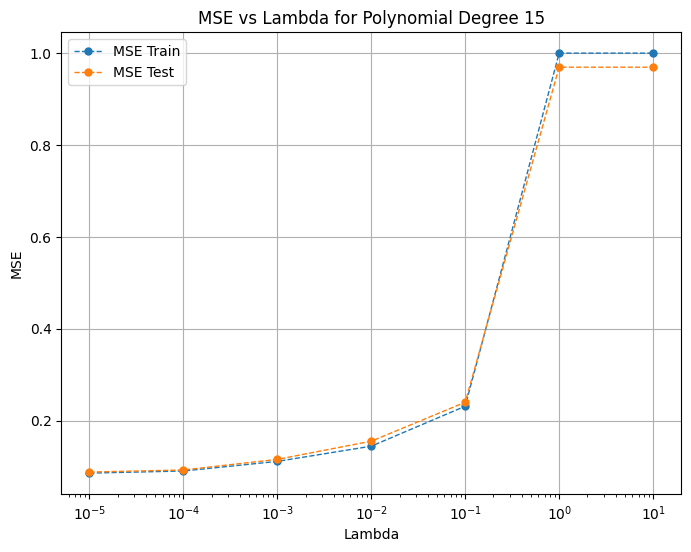

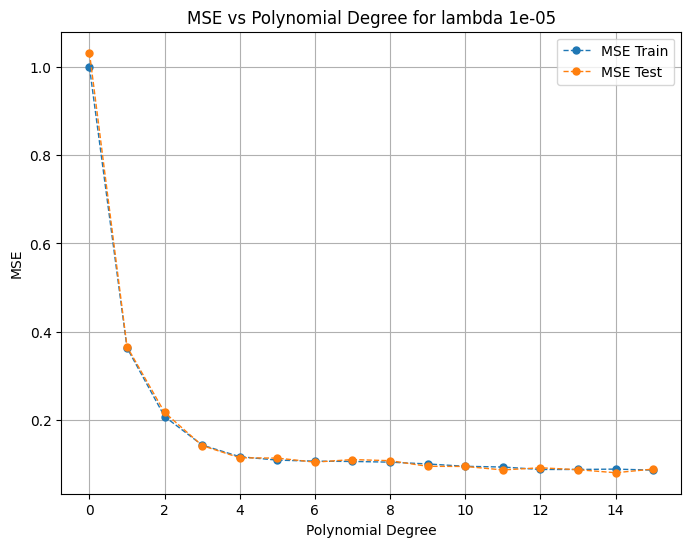

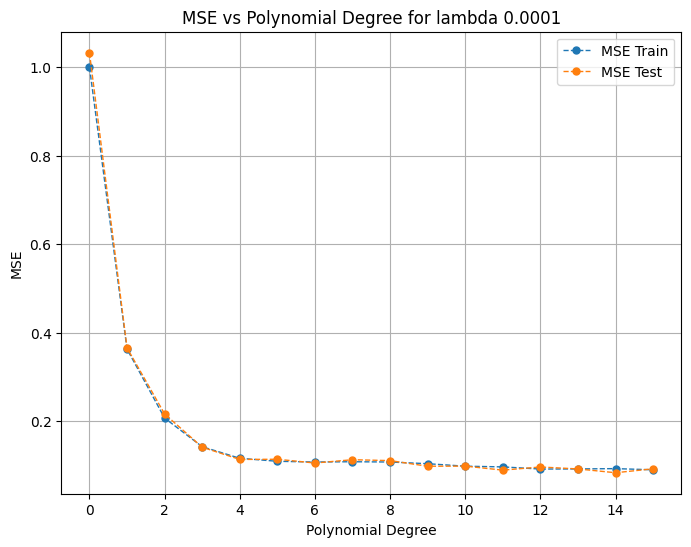

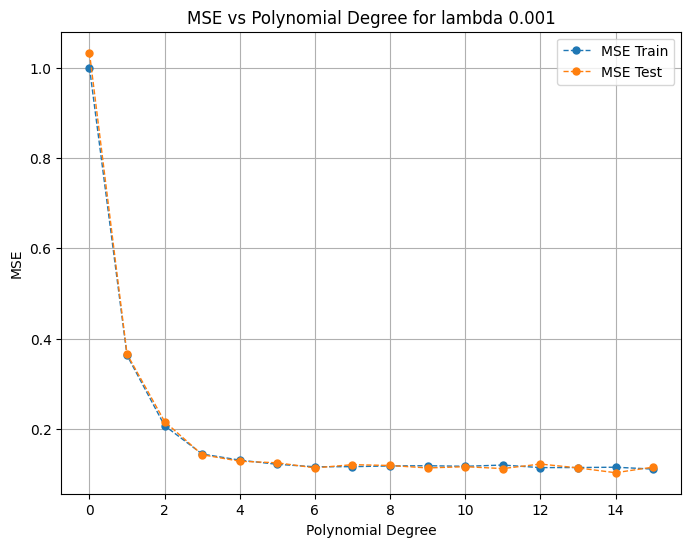

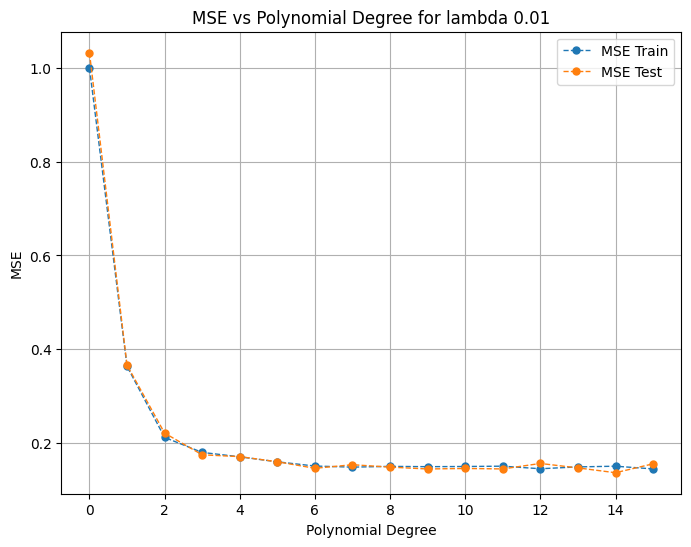

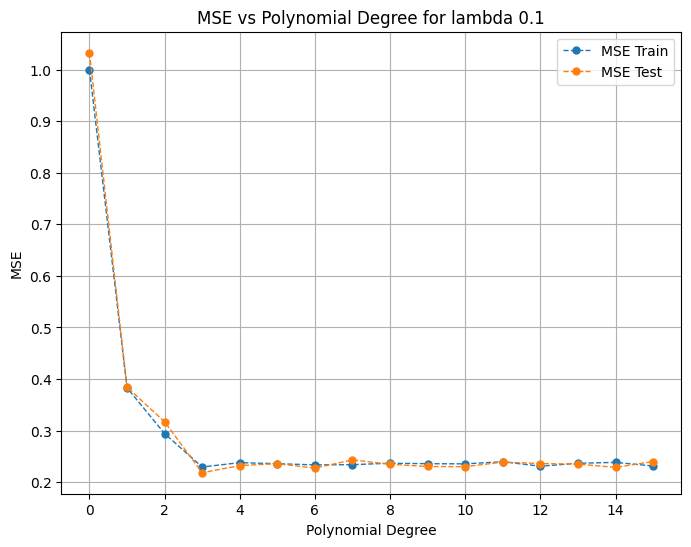

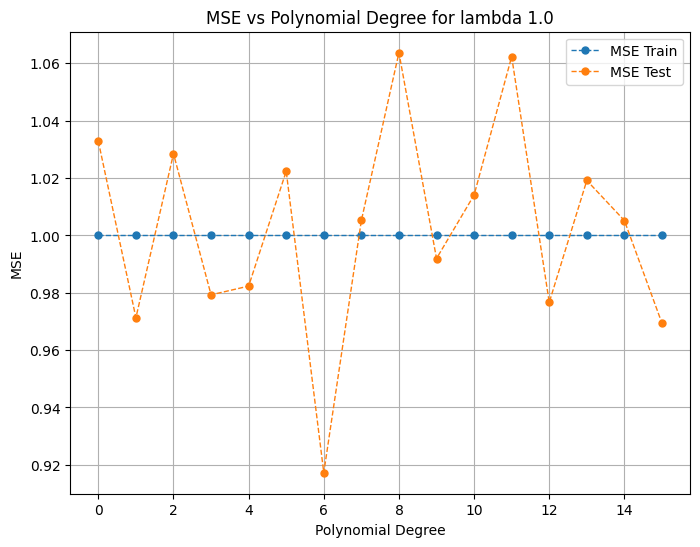

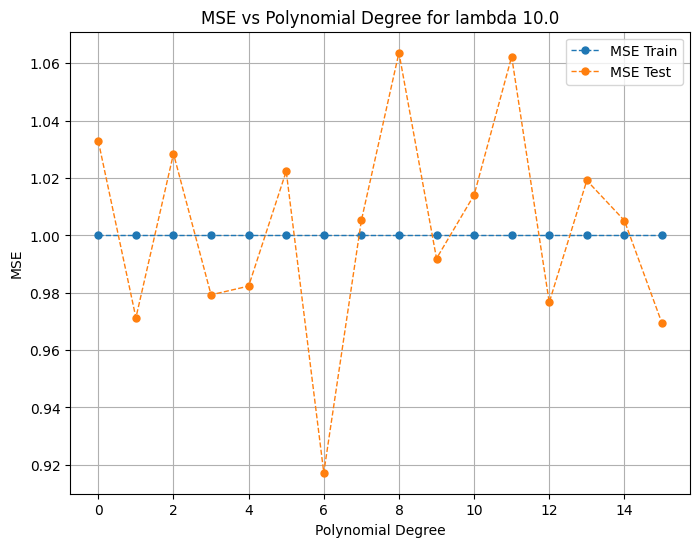

In [19]:
MSElasso_train = np.zeros((maxdegree,len(lm_val)))
MSElasso_test = np.zeros((maxdegree,len(lm_val)))
R2lasso_train = np.zeros((maxdegree,len(lm_val)))
R2lasso_test = np.zeros((maxdegree,len(lm_val)))

np.random.seed(7935)
#start of the big loop
for i in range (maxdegree):
  X = design_matrix(x, y, i)
  X_train, X_test, f_train, f_test = split_and_scale(X, f)

  #polynomial ridge regression (both with my model and scikt)
  for j, lmd in enumerate(lm_val):
      RegLasso = linear_model.Lasso(lmd,fit_intercept=True, max_iter=10000)
      RegLasso.fit(X_train,f_train)
      fpredictLasso = RegLasso.predict(X_test)
      ftildeLasso = RegLasso.predict(X_train)
      #fill the matrices
      MSElasso_train[i,j] = calculateMSE(f_train, ftildeLasso)
      MSElasso_test[i,j] = calculateMSE(f_test, fpredictLasso)
      R2lasso_train[i,j] = R2(f_train, ftildeLasso)
      R2lasso_test[i,j] = R2(f_test, fpredictLasso)

  if i in range(maxdegree):
      plt.figure(figsize=(8, 6))
      plt.plot(lm_val, MSElasso_train[i], label='MSE Train', marker='o', linestyle='--', markersize=5, linewidth=1)
      plt.plot(lm_val, MSElasso_test[i], label='MSE Test', marker='o', linestyle='--', markersize=5, linewidth=1)
      plt.xscale('log')  # Scala logaritmica per lambda
      plt.xlabel('Lambda')
      plt.ylabel('MSE')
      plt.title(f'MSE vs Lambda for Polynomial Degree {i}')
      plt.legend()
      plt.grid(True)
      plt.show()

for k, lmd in enumerate(lm_val):
    #if k in [1, 3]:
        plt.figure(figsize=(8, 6))
        plt.plot(polydegree, MSElasso_train[:,k], label='MSE Train', marker='o', linestyle='--', markersize=5, linewidth=1)
        plt.plot(polydegree, MSElasso_test[:,k], label='MSE Test', marker='o', linestyle='--', markersize=5, linewidth=1)
        plt.xlabel('Polynomial Degree')
        plt.ylabel('MSE')
        plt.title(f'MSE vs Polynomial Degree for lambda {lm_val[k]}')
        plt.legend()
        plt.grid(True)
        plt.show()


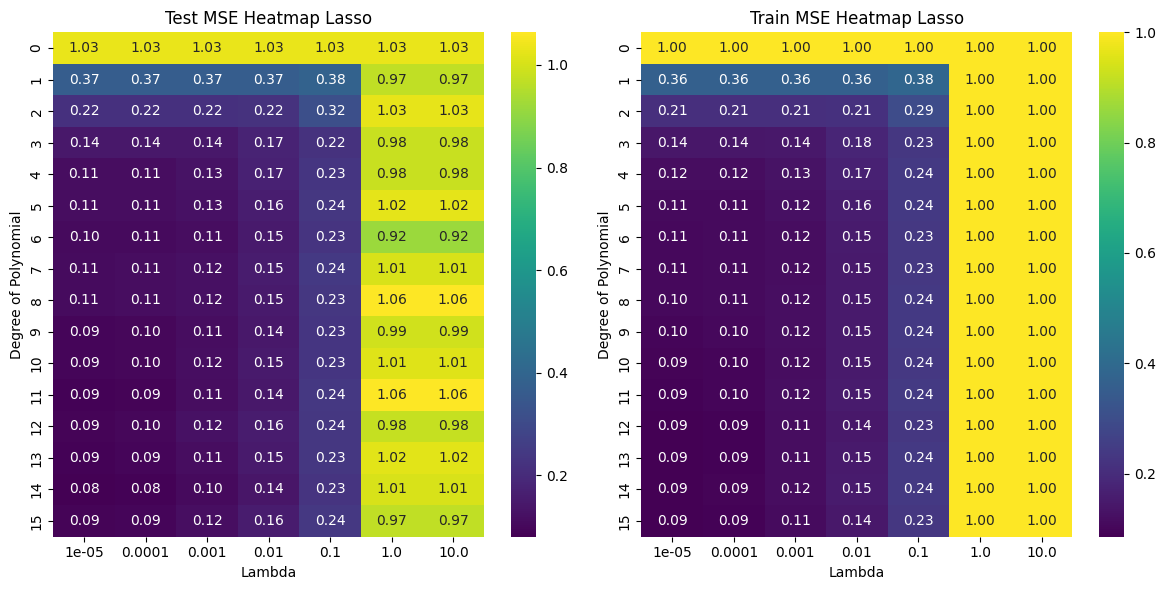

In [20]:
#create the heatmap for lasso regression
plt.figure(figsize=(12, 6))
np.random.seed(7935)
plt.subplot(1, 2, 1)
sns.heatmap(MSElasso_test, annot=True, fmt=".2f", cmap='viridis', xticklabels=lm_val, yticklabels=range(maxdegree) )
ax.set_aspect('equal', adjustable='box')
plt.title('Test MSE Heatmap Lasso')
plt.xlabel('Lambda')
plt.ylabel('Degree of Polynomial')

plt.subplot(1, 2, 2)
sns.heatmap(MSElasso_train, annot=True, fmt=".2f", cmap='viridis', xticklabels=lm_val, yticklabels=range(maxdegree))
plt.title('Train MSE Heatmap Lasso')
plt.xlabel('Lambda')
plt.ylabel('Degree of Polynomial')

plt.tight_layout()
plt.show()

## Bias-variance trade-off

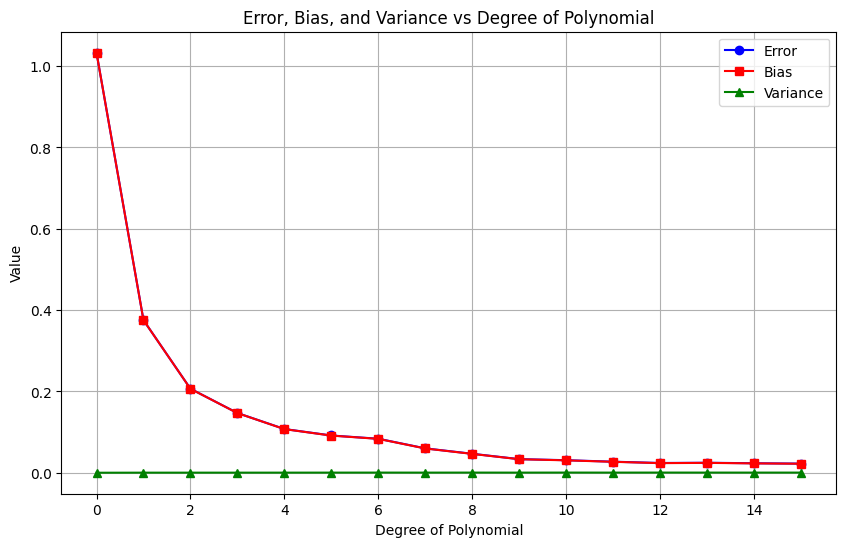

In [21]:
maxdegree= 16 #choose the maximum degree
polydegree = np.zeros(maxdegree)
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)

n_boostraps = 200 #choose number of bootsraps

for i in range(maxdegree):
    X = design_matrix(x, y, i)
    X_train, X_test, f_train, f_test = split_and_scale(X, f)
    f_pred = np.empty((f_test.shape[0], n_boostraps))
    for j in range(n_boostraps):
        X_, f_ = resample(X_train, f_train)
        beta_resampled = calcuateB(X_, f_)
        f_pred[:, j] = X_test @ beta_resampled

    polydegree[i] = i
    #error[i] = np.mean( np.mean((f_test - f_pred)**2, axis=1, keepdims=True) )
    error[i] = np.mean(np.mean((f_test[:, np.newaxis] - f_pred)**2, axis=1, keepdims=True))
    bias[i] = np.mean( (f_test[:, np.newaxis] - np.mean(f_pred, axis=1, keepdims=True))**2 )
    variance[i] = np.mean( np.var(f_pred, axis=1, keepdims=True))
    #print(f"Degree: {i}")
    #print(f"MSE: {error[i]}")
    #print(f"Bias: {bias[i]}")
    #print(f"Variance: {variance[i]}")
    #print('{} >= {} + {} = {}'.format(error[i], bias[i], variance[i], bias[i]+variance[i]))
    #print("-" * 30)

plt.figure(figsize=(10, 6))
plt.plot(polydegree, error, label='Error', color='blue', marker='o')
plt.plot(polydegree, bias, label='Bias', color='red', marker='s')
plt.plot(polydegree, variance, label='Variance', color='green', marker='^')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Value')
plt.title('Error, Bias, and Variance vs Degree of Polynomial')
plt.legend()
plt.grid(True)
plt.show()


## Cross validation

### OLS

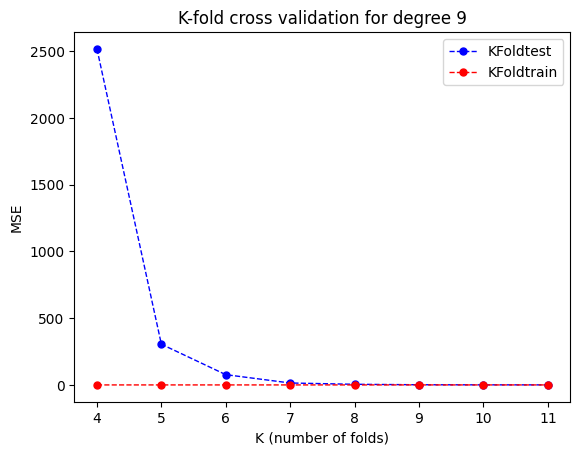

In [22]:
deg = 9 #choose the degree for the cross validation

X = design_matrix(x, y, deg)
np.random.seed(7935)

K =[4,5,6,7, 8,9,10,11]
estimated_mse_KFold_test = []
estimated_mse_KFold_train = []

#loop on different values of K
for k in K:
  kfold = KFold(n_splits = k)
  scores_KFold_test = []
  scores_KFold_train = []
  for train_inds, test_inds in kfold.split(X):
    Xtrain = X[train_inds]
    ftrain = f[train_inds]
    Xtest = X[test_inds]
    ftest = f[test_inds]

    scaler_X = StandardScaler(with_std=True)
    scaler_X.fit(Xtrain)
    scaler_f = StandardScaler(with_std=True)
    scaler_f.fit(ftrain.reshape(-1, 1))

    #scale the datas (in this case we could not use the function defined by us)
    Xtrain = scaler_X.transform(Xtrain)
    Xtest = scaler_X.transform(Xtest)
    ftrain = scaler_f.transform(ftrain.reshape(-1, 1)).ravel()
    ftest = scaler_f.transform(ftest.reshape(-1, 1)).ravel()

    beta = calcuateB(Xtrain, ftrain)
    fpred = Xtest @ beta
    ftilde = Xtrain @ beta

    scores_KFold_test.append(calculateMSE(ftest, fpred))
    scores_KFold_train.append(calculateMSE(ftrain, ftilde))

  estimated_mse_KFold_test.append(np.mean(scores_KFold_test)) # Append the mean to the list
  estimated_mse_KFold_train.append(np.mean(scores_KFold_train)) # Append the mean to the list

plt.figure()
plt.title(f'K-fold cross validation for degree {deg}')
plt.plot(K, estimated_mse_KFold_test, color='blue', marker='o', linestyle='--', markersize=5, linewidth=1, label = 'KFoldtest')
plt.plot(K, estimated_mse_KFold_train, color='red', marker='o', linestyle='--', markersize=5, linewidth=1, label = 'KFoldtrain')
plt.xlabel('K (number of folds)')
plt.ylabel('MSE')
plt.legend()
plt.show()

### Ridge

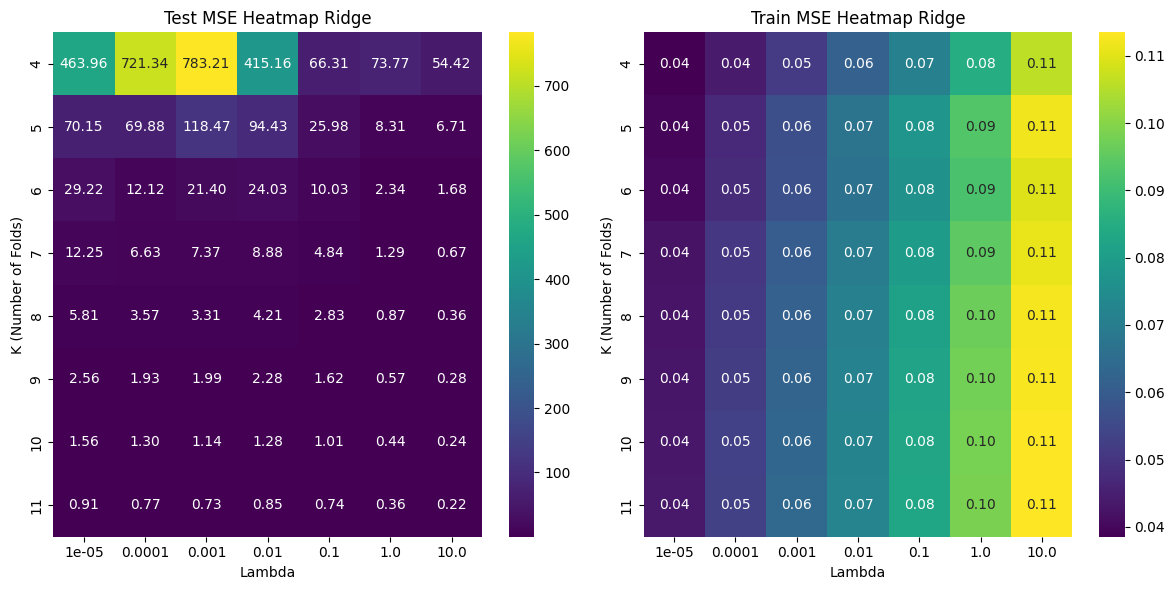

In [23]:

deg = 9 #choose degree for cross validation
X = design_matrix(x, y, deg)

np.random.seed(7935)
lm_val = [1e-5, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
K = [4, 5, 6, 7, 8, 9, 10, 11]  # Valori di k

mse_test = np.zeros((len(K), len(lm_val)))
mse_train = np.zeros((len(K), len(lm_val)))

# K-Fold Cross-Validation
for k_index, k in enumerate(K):
    kfold = KFold(n_splits=k)

    for l_index, lmd in enumerate(lm_val):
        scores_KFold_test = []
        scores_KFold_train = []

        for train_inds, test_inds in kfold.split(X):
            Xtrain = X[train_inds]
            ftrain = f[train_inds]
            Xtest = X[test_inds]
            ftest = f[test_inds]
            scaler_X = StandardScaler(with_std=True)
            scaler_X.fit(Xtrain)
            scaler_f = StandardScaler(with_std=True)
            scaler_f.fit(ftrain.reshape(-1, 1))

            #scale the datas (in this case we could not use the function defined by us)
            Xtrain = scaler_X.transform(Xtrain)
            Xtest = scaler_X.transform(Xtest)
            ftrain = scaler_f.transform(ftrain.reshape(-1, 1)).ravel()
            ftest = scaler_f.transform(ftest.reshape(-1, 1)).ravel()

            beta = betaRIDGE(Xtrain, ftrain, lmd)

            fpred = Xtest @ beta
            ftilde = Xtrain @ beta

            scores_KFold_test.append(calculateMSE(ftest, fpred))
            scores_KFold_train.append(calculateMSE(ftrain, ftilde))

        mse_test[k_index, l_index] = np.mean(scores_KFold_test)
        mse_train[k_index, l_index] = np.mean(scores_KFold_train)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(mse_test, annot=True, fmt=".2f", cmap='viridis', xticklabels=lm_val, yticklabels=K)
plt.title('Test MSE Heatmap Ridge')
plt.xlabel('Lambda')
plt.ylabel('K (Number of Folds)')

plt.subplot(1, 2, 2)
sns.heatmap(mse_train, annot=True, fmt=".2f", cmap='viridis', xticklabels=lm_val, yticklabels=K)
plt.title('Train MSE Heatmap Ridge')
plt.xlabel('Lambda')
plt.ylabel('K (Number of Folds)')

plt.tight_layout()
plt.show()


### Lasso

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.215e+02, tolerance: 7.500e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.358e+02, tolerance: 7.500e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.403e+02, tolerance: 7.500e

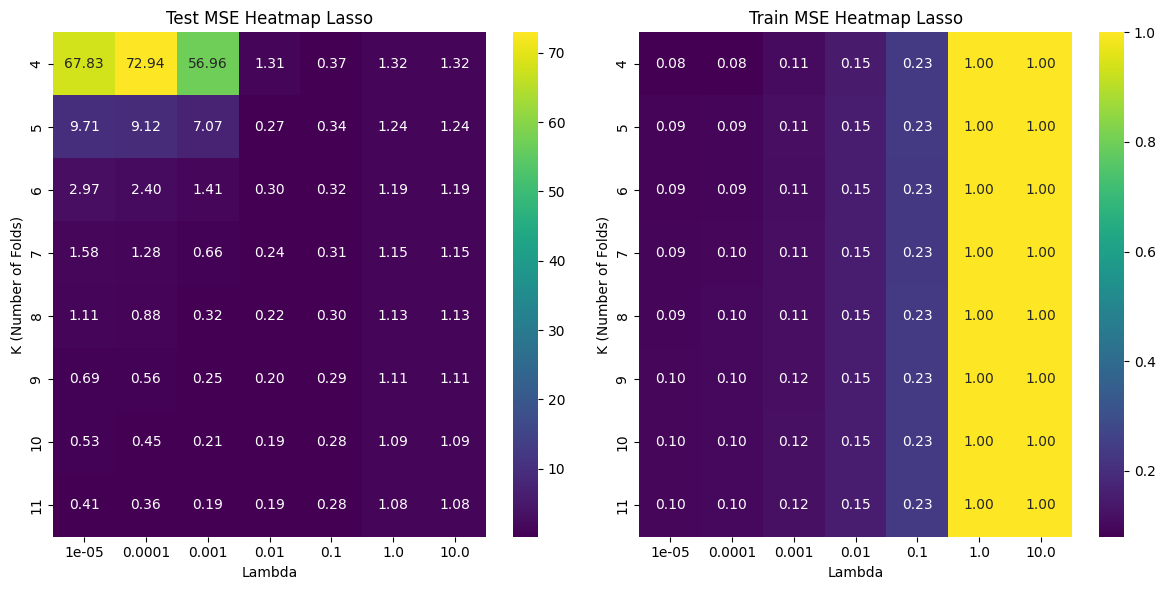

In [24]:
#lasso cross validation

deg = 9 #choose the polynomial degree
X = design_matrix(x, y, deg)
np.random.seed(7935)
lm_val = [1e-5, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
K = [4, 5, 6, 7, 8, 9, 10, 11]  # Valori di k

mse_test = np.zeros((len(K), len(lm_val)))
mse_train = np.zeros((len(K), len(lm_val)))

# K-Fold Cross-Validation
for k_index, k in enumerate(K):
    kfold = KFold(n_splits=k)

    for l_index, lmd in enumerate(lm_val):
        scores_KFold_test = []
        scores_KFold_train = []

        for train_inds, test_inds in kfold.split(X):
            Xtrain = X[train_inds]
            ftrain = f[train_inds]
            Xtest = X[test_inds]
            ftest = f[test_inds]
            scaler_X = StandardScaler(with_std=True)
            scaler_X.fit(Xtrain)
            scaler_f = StandardScaler(with_std=True)
            scaler_f.fit(ftrain.reshape(-1, 1))

            #scale the datas (in this case we could not use the function defined by us)
            Xtrain = scaler_X.transform(Xtrain)
            Xtest = scaler_X.transform(Xtest)
            ftrain = scaler_f.transform(ftrain.reshape(-1, 1)).ravel()
            ftest = scaler_f.transform(ftest.reshape(-1, 1)).ravel()

            RegLasso = linear_model.Lasso(lmd,fit_intercept=True, max_iter=10000) #we reduced the number of iteration because of running time
            RegLasso.fit(Xtrain,ftrain)
            fpred = RegLasso.predict(Xtest)
            ftilde = RegLasso.predict(Xtrain)

            scores_KFold_test.append(calculateMSE(ftest, fpred))
            scores_KFold_train.append(calculateMSE(ftrain, ftilde))

        mse_test[k_index, l_index] = np.mean(scores_KFold_test)
        mse_train[k_index, l_index] = np.mean(scores_KFold_train)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(mse_test, annot=True, fmt=".2f", cmap='viridis', xticklabels=lm_val, yticklabels=K)
plt.title('Test MSE Heatmap Lasso')
plt.xlabel('Lambda')
plt.ylabel('K (Number of Folds)')

plt.subplot(1, 2, 2)
sns.heatmap(mse_train, annot=True, fmt=".2f", cmap='viridis', xticklabels=lm_val, yticklabels=K)
plt.title('Train MSE Heatmap Lasso')
plt.xlabel('Lambda')
plt.ylabel('K (Number of Folds)')

plt.tight_layout()
plt.show()